In [3]:
#필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자

# 마이너스(-) 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 4. enter.content_page
- 콘텐츠 개별 페이지 진입
- 가입을 안해도 개별 콘텐츠 페이지에 들어올 수 있음

In [6]:
enter_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.content_page.csv')
enter_content.drop(columns=['device_carrier'], inplace=True)
enter_content.rename(columns={'content.id': 'content_id'}, inplace=True)
enter_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seoul,2023-04-05 21:40:35.740000,South Korea,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd
3,Daejeon,2023-04-05 21:14:25.355000,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
4,Seoul,2023-04-05 21:44:23.759000,South Korea,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [ ]:
# 모바일 환경, 웹 환경 사용 비율 확인해보기
enter_content['os_name'].value_counts()

os_name
Chrome                  1311815
Edge                     172214
Mobile Safari             81828
Safari                    79381
Whale                     76407
Samsung Browser           62859
Instagram                 35221
Chrome WebView            30677
Chrome Mobile             30082
WebKit                    14381
Firefox                    7414
Facebook                   5509
GSA                        2689
Chrome Headless            1562
Opera                       865
Avast Secure Browser        396
Yandex                      297
Android Browser             179
Opera Touch                  87
MIUI Browser                 76
Electron                     61
Silk                         44
WeChat                       22
Puffin                       13
Chromium                     10
Line                          6
AVG Secure Browser            5
QQBrowser                     3
UCBrowser                     3
Maxthon                       2
Name: count, dtype: int64

# 5. click.content_page_start_content_button
- 콘텐츠 수강하기 버튼 클릭
1. 인기 있는 무료 컨텐츠(미끼) vs 인기 없는 무료 컨텐츠의 구독 전환률    
2. **[학습 전환율]** 콘텐츠 리뷰 클릭수가 콘텐트 시작으로 이어지나?

In [10]:
click_start_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.content_page_start_content_button.csv')
click_start_content.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
click_start_content.rename(columns={'client_event_time': 'click_start_content_time'}, inplace=True)
click_start_content.drop(click_start_content[click_start_content['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
click_start_content['click_start_content_time'] = pd.to_datetime(click_start_content['click_start_content_time'])

# 9시간 추가 (UTC+9 적용)
click_start_content['click_start_content_time'] = click_start_content['click_start_content_time'] + pd.Timedelta(hours=9)

# 시간 필터링
click_start_content = click_start_content.loc[
    click_start_content['click_start_content_time'].dt.year.between(2022, 2023)]

# button name 변수명 수정하기
click_start_content.rename(columns={'button_name': 'button_name_type_a', 'button.name': 'button_name_type_b','content.id': 'content_id'}, inplace=True)
click_start_content.head()

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_25392/3860315906.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  click_start_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.content_page_start_content_button.csv')


,city,click_start_content_time,country,device_type,event_type,language,os_name,user_id,content_id,button_name_type_b,button_name_type_a
0,Daejeon,2023-04-06 06:14:38.432,South Korea,Windows,click.content_page_start_content_button,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
1,Seongnam-si,2023-04-10 23:57:20.033,South Korea,Windows,click.content_page_start_content_button,Korean,Edge,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,NaN
2,Yangp'yong,2023-04-10 23:28:29.515,South Korea,Windows,click.content_page_start_content_button,Korean,Chrome,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,NaN
3,Seo-gu,2023-04-10 23:09:30.564,South Korea,Windows,click.content_page_start_content_button,Korean,Chrome,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,콘텐츠 이어보기,NaN
4,Seo-gu,2023-04-10 23:10:52.368,South Korea,Windows,click.content_page_start_content_button,Korean,Chrome,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,NaN


# 6. click.content_page_more_review_button
- 콘텐츠 후기 더보기 버튼 클릭

In [9]:
click_review = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.content_page_more_review_button.csv')
click_review.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
click_review.rename(columns={'client_event_time': 'click_review_time'}, inplace=True)
click_review.drop(click_review[click_review['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
click_review['click_review_time'] = pd.to_datetime(click_review['click_review_time'])

# 9시간 추가 (UTC+9 적용)
click_review['click_review_time'] = click_review['click_review_time'] + pd.Timedelta(hours=9)

# 시간 필터링
click_review = click_review.loc[
    click_review['click_review_time'].dt.year.between(2022, 2023)]

# button name 변수명 수정하기
click_review.rename(columns={'button_name': 'button_name_type_a', 'button.name': 'button_name_type_b','content.id': 'content_id'}, inplace=True)
click_review.head()

,city,click_review_time,country,device_type,event_type,language,os_name,user_id,content_id
0,Seo-gu,2023-04-10 23:10:01.402,South Korea,Windows,click.content_page_more_review_button,Korean,Chrome,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-25 06:37:43.417,United Kingdom,Windows,click.content_page_more_review_button,Korean,Whale,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 23:44:16.897,South Korea,Windows,click.content_page_more_review_button,Korean,Chrome,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 23:30:36.568,South Korea,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 12:24:32.337,South Korea,Windows,click.content_page_more_review_button,Korean,Chrome,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e


In [ ]:
# 많이 클릭된 콘텐츠 분포
user_contentid = click_review['content_id'].value_counts()
user_contentid.head(20)

content_id
f4be1a0fe0e301b03115591777fddf29    12765
710ffb5be9f89772b7baa9f62c9c8805     3119
7cebec6e79cc981dbf421c5ec2aedd9d     2623
f491517f4737a60d661cd1fcacc702c0     2319
32cf55a55adcc30ad80b674c0fee2ff4     2217
ff7998135d650dbefb3f479c900cbcc7     2038
595cb4bbfc83e683b0314ca1312cfbde     1698
b314d5aba64a0aab40602cb72a4a1504     1554
c269eb6df3a374b464f7c18f12fa398f     1541
d6227ba76134f6cf821bb98b5f235bd0      827
68a3658f1b936bfff3bd6960cd561b0a      700
afe201c04b426366e0f8e9e2207c78c2      671
a914987711c7e2db9fd4bff7555ec87c      628
621c7ad99b17d2d16832b618d47aea7e      565
6384828b0188f36e5915ed72fdeb7157      453
db1819d3a7a4c4d85dccb3b9e982fbcd      429
4641438a6c81ef572d997dbdc9100f8b      419
ab7068685b7aeac4d6b1a6c0e1c85819      392
b8d4ec0133e5ce485055bfd69cd28abd      392
220ce7873b8895d0c81c37600b5bd1e7      388
Name: count, dtype: int64

# 5,6,8 데이터 merge
- 13번 데이터에서 무료 콘텐츠 리스트 뽑아냄
- 첫 결제로 넘어갔는지 보기 위해 8번 데이터 merge

In [ ]:
# 필요한 컬럼만 선택
click_start_content_selected = click_start_content[['user_id', 'content_id', 'click_start_content_time', 'os_name']]
click_review_selected = click_review[['user_id', 'content_id', 'click_review_time', 'os_name']]
complete_subscription_selected = complete_subscription[['user_id', 'complete_subscription_time', 'os_name']]

# Chunk 크기 설정
chunk_size = 100000  # 한 번에 처리할 행 수
merged_chunks = []

# click_review_selected는 (user_id, content_id)를 기준으로 병합하므로 인덱스 설정
click_review_selected.set_index(['user_id', 'content_id'], inplace=True)

# complete_subscription_selected는 user_id만 기준으로 병합하므로 user_id만 인덱스로 설정
complete_subscription_selected.set_index('user_id', inplace=True)

# click_start_content_selected를 작은 조각으로 나누어 병합 수행
for chunk in np.array_split(click_start_content_selected, len(click_start_content_selected) // chunk_size + 1):
    # chunk를 기준으로 review 데이터와 병합 (left join)
    chunk_merged = chunk.merge(click_review_selected, on=['user_id', 'content_id'], how='left')

    # 구독 완료 데이터는 user_id 기준으로 병합 (content_id 없음)
    chunk_merged = chunk_merged.merge(complete_subscription_selected, on='user_id', how='left')

    merged_chunks.append(chunk_merged)

# 최종 병합된 데이터프레임
merged_df = pd.concat(merged_chunks, ignore_index=True)

# 날짜 컬럼을 datetime으로 변환 (필요한 경우)
merged_df['click_start_content_time'] = pd.to_datetime(merged_df['click_start_content_time'])
merged_df['click_review_time'] = pd.to_datetime(merged_df['click_review_time'])
merged_df['complete_subscription_time'] = pd.to_datetime(merged_df['complete_subscription_time'])

# 2022~2023년 데이터 필터링
merged_df = merged_df.loc[
    merged_df['click_start_content_time'].dt.year.between(2022, 2023)
]

# 결과 확인
display(merged_df)



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,user_id,content_id,click_start_content_time,os_name_x,click_review_time,os_name_y,complete_subscription_time,os_name
0,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,2023-04-06 06:14:38.432,Edge,NaT,NaN,2022-06-23 17:07:25.279,Chrome
1,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,2023-04-10 23:57:20.033,Edge,NaT,NaN,2023-03-12 18:04:27.409,Samsung Browser
2,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,2023-04-10 23:28:29.515,Chrome,NaT,NaN,NaT,NaN
3,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,2023-04-10 23:09:30.564,Chrome,NaT,NaN,2023-04-03 08:20:01.495,Chrome
4,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,2023-04-10 23:10:52.368,Chrome,NaT,NaN,2023-04-03 08:20:01.495,Chrome
...,...,...,...,...,...,...,...,...
47193334,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 14:41:43.314,Chrome,2023-08-03 03:08:09.866,Chrome,NaT,NaN
47193335,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 14:41:43.314,Chrome,2023-08-15 19:12:29.396,Whale,NaT,NaN
47193336,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 14:41:43.314,Chrome,2023-12-19 11:06:45.302,Edge,NaT,NaN
47193337,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 14:41:43.314,Chrome,2023-08-06 00:37:58.488,Chrome,NaT,NaN


In [ ]:
# 무료 콘텐츠 ID 목록만 필터링
filtered_merged_df = merged_df[merged_df['content_id'].apply(
    lambda x: isinstance(x, list) and any(cid in free_contents_ids for cid in x)
)]


In [ ]:
# `user_id`가 NaN인 행 제거
merged_df = merged_df.dropna(subset=['user_id'])

# 중복값 제거 (같은 콘텐츠 ID와 클릭 시간이 중복될 경우 하나만 유지)
merged_df = merged_df.drop_duplicates(subset=['content_id', 'click_start_content_time'], keep='first')

# content_id가 리스트 형태가 아닐 가능성이 있으므로 explode() 적용
merged_df_exploded = merged_df.explode('content_id')

# 무료 콘텐츠 ID만 필터링
filtered_merged_df = merged_df_exploded[merged_df_exploded['content_id'].isin(free_contents_ids)]

# 다시 user_id 기준으로 그룹화 (리스트로 변환)
filtered_grouped_df = filtered_merged_df.groupby('user_id').agg({
    'content_id': list,  # 콘텐츠 ID 리스트로 묶음
    'click_start_content_time': list,  # 클릭 시간 리스트화
    'click_review_time': list,  # 리뷰한 시간 리스트화
    'complete_subscription_time': list,  # 구독한 시간 리스트화
    'os_name_x': list  # OS 리스트
}).reset_index()

# 결과 확인
display(filtered_grouped_df)



,user_id,content_id,click_start_content_time,click_review_time,complete_subscription_time,os_name_x
0,0001435bc6c0c0f05315192f89275425,"[61b6463287573f00de13a930805a52d6, 61b64632875...","[2023-01-16 20:42:20.739000, 2023-01-16 10:00:...","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[Chrome, Chrome, Chrome]"
1,0003691a8bc9f96481baa7086ae04592,[61b6463287573f00de13a930805a52d6],[2022-11-06 20:59:00.162000],[NaT],[NaT],[Chrome Mobile]
2,0003c0ede663b9e3b55d9dc3f7e8690f,[8a72eed73d3f9d3ab1771548070e7338],[2023-02-08 01:40:05.215000],[NaT],[NaT],[Chrome]
3,000634ec5553ca63f77c61690353a0be,"[445fac33232adcb3d1cdab7d8a579430, 445fac33232...","[2023-05-26 15:06:18.658000, 2023-05-26 15:06:...","[NaT, NaT]","[NaT, NaT]","[Instagram, Instagram]"
4,000722d5152d121ef57d8246dff4ac91,[f4be1a0fe0e301b03115591777fddf29],[2022-12-13 18:54:50.431000],[NaT],[NaT],[Chrome]
...,...,...,...,...,...,...
24961,fff60192556898a9001de93f8708bedf,"[f4be1a0fe0e301b03115591777fddf29, 710ffb5be9f...","[2022-11-19 09:40:53.996000, 2022-11-21 03:11:...","[NaT, NaT]","[NaT, NaT]","[Chrome, Chrome]"
24962,fff8b3be926adfb193591e262b087b74,[d6227ba76134f6cf821bb98b5f235bd0],[2022-03-13 15:49:36.633000],[NaT],[NaT],[Chrome]
24963,fffba676b17f9f0f228360930f238f07,[f4be1a0fe0e301b03115591777fddf29],[2022-06-20 17:42:06.657000],[NaT],[NaT],[Chrome]
24964,fffd757f689e039a1d4db0adc1b80b61,"[61b6463287573f00de13a930805a52d6, 61b64632875...","[2023-01-16 20:11:34.191000, 2023-01-17 09:11:...","[NaT, NaT]","[NaT, NaT]","[Mobile Safari, WebKit]"


### 1. 무료 콘텐츠를 들은 유저 중 구독한 유저 vs 구독하지 않은 유저 비율 계산

In [36]:
# 무료 콘텐츠를 들은 유저 수
total_users = len(filtered_grouped_df)

# complete_subscription_time이 NaN이 아닌 (구독한) 유저 수
subscribed_users = filtered_grouped_df['complete_subscription_time'].apply(lambda x: any(pd.notna(x))).sum()

# 구독하지 않은 유저 수
non_subscribed_users = total_users - subscribed_users

# 비율 계산
subscribed_ratio = subscribed_users / total_users * 100
non_subscribed_ratio = non_subscribed_users / total_users * 100

# 결과 출력
print(f"✅ 총 유저 수: {total_users}")
print(f"✅ 구독한 유저 수: {subscribed_users} ({subscribed_ratio:.2f}%)")
print(f"✅ 구독하지 않은 유저 수: {non_subscribed_users} ({non_subscribed_ratio:.2f}%)")


✅ 총 유저 수: 24966
✅ 구독한 유저 수: 7657 (30.67%)
✅ 구독하지 않은 유저 수: 17309 (69.33%)


In [35]:
# 콘텐츠별 클릭 횟수 계산
click_counts = filtered_merged_df['content_id'].value_counts().reset_index()
click_counts.columns = ['content_id', 'click_count']

# 클릭 수가 많은 상위 10개 콘텐츠 확인
top_clicked_contents = click_counts.sort_values(by='click_count', ascending=False).head(10)

display(top_clicked_contents)

,content_id,click_count
0,f4be1a0fe0e301b03115591777fddf29,13140
1,61b6463287573f00de13a930805a52d6,8858
2,68a3658f1b936bfff3bd6960cd561b0a,4589
3,d6227ba76134f6cf821bb98b5f235bd0,3347
4,7cebec6e79cc981dbf421c5ec2aedd9d,3260
5,445fac33232adcb3d1cdab7d8a579430,2607
6,afe201c04b426366e0f8e9e2207c78c2,2545
7,621c7ad99b17d2d16832b618d47aea7e,2071
8,710ffb5be9f89772b7baa9f62c9c8805,2031
9,a914987711c7e2db9fd4bff7555ec87c,1845


### 2. 인기있는 콘텐츠와 인기 없는 콘텐츠의 구독 전환율 차이

In [ ]:
#  무료 콘텐츠별 클릭 횟수 계산
content_click_counts = filtered_merged_df['content_id'].value_counts().reset_index()
content_click_counts.columns = ['content_id', 'click_count']

# 클릭 수 기준 상위 20%를 인기 콘텐츠, 하위 20%를 비인기 콘텐츠로 정의
top_20_contents = content_click_counts['click_count'].quantile(0.8)
bottom_20_contents = content_click_counts['click_count'].quantile(0.2)

popular_contents = set(content_click_counts[content_click_counts['click_count'] >= top_20_contents]['content_id'])
unpopular_contents = set(content_click_counts[content_click_counts['click_count'] <= bottom_20_contents]['content_id'])

# 인기 콘텐츠 & 비인기 콘텐츠를 들은 유저 필터링
users_from_popular = filtered_grouped_df[filtered_grouped_df['content_id'].apply(lambda x: any(cid in popular_contents for cid in x))]
users_from_unpopular = filtered_grouped_df[filtered_grouped_df['content_id'].apply(lambda x: any(cid in unpopular_contents for cid in x))]

# 구독 전환율 계산 함수
def calculate_subscription_rate(user_df):
    total_users = len(user_df)
    subscribed_users = user_df['complete_subscription_time'].apply(lambda x: any(pd.notna(x))).sum()
    return (subscribed_users / total_users) * 100 if total_users > 0 else 0

# 인기 콘텐츠 vs 비인기 콘텐츠 첫 구독 전환율 계산
popular_conversion_rate = calculate_subscription_rate(users_from_popular)
unpopular_conversion_rate = calculate_subscription_rate(users_from_unpopular)

# 결과 출력
print(f"✅ 인기 있는 무료 콘텐츠 첫 구독 전환율: {popular_conversion_rate:.2f}%")
print(f"✅ 인기 없는 무료 콘텐츠 첫 구독 전환율: {unpopular_conversion_rate:.2f}%")


✅ 인기 있는 무료 콘텐츠 첫 구독 전환율: 32.51%
✅ 인기 없는 무료 콘텐츠 첫 구독 전환율: 32.74%


### 가설 주제</br>
"인기 있는 무료 콘텐츠를 들은 유저가 구독 전환율이 더 높다"</br>
</br>
1. 귀무가설
"인기 있는 무료 콘텐츠와 인기 없는 무료 콘텐츠를 들은 유저의 구독 전환율 차이는 없다."</br>
즉, popular_conversion_rate = unpopular_conversion_rate</br>
</br>
2. 대립가설</br>
"인기 있는 무료 콘텐츠를 들은 유저의 구독 전환율이 더 높다."</br>
즉, popular_conversion_rate > unpopular_conversion_rate</br>
</br>
3. Z검정 수행 </br>
- 평균 비교가 아닌 구독 전환율의 비교이기 때문에 Z검정 수행</br>
- 이항 분포 데이터 (구독했다, 구독하지 않았다)로 구분하기 때문에</br>
- 구독 전환시간 평균 비교시 t-검정도 해볼만함

In [49]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 14.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [51]:

from statsmodels.stats.proportion import proportions_ztest

# 인기 콘텐츠 & 비인기 콘텐츠 유저 수
n1 = len(users_from_popular)
n2 = len(users_from_unpopular)

# 각 그룹의 구독자 수
subscribed1 = users_from_popular['complete_subscription_time'].apply(lambda x: any(pd.notna(x))).sum()
subscribed2 = users_from_unpopular['complete_subscription_time'].apply(lambda x: any(pd.notna(x))).sum()

# 각 그룹의 구독 전환율
p1 = subscribed1 / n1
p2 = subscribed2 / n2

# Z-test 수행
count = np.array([subscribed1, subscribed2])
nobs = np.array([n1, n2])
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# 🔹 결과 출력
print(f"인기 콘텐츠 구독 전환율: {p1:.2%} (n={n1})")
print(f"비인기 콘텐츠 구독 전환율: {p2:.2%} (n={n2})")
print(f"Z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 🔹 검정 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 인기 콘텐츠를 들은 유저가 구독 전환율이 유의미하게 높다.")
else:
    print("귀무가설 채택: 인기 콘텐츠와 비인기 콘텐츠 유저 간 구독 전환율 차이는 유의미하지 않다.")


인기 콘텐츠 구독 전환율: 32.51% (n=18321)
비인기 콘텐츠 구독 전환율: 32.74% (n=1512)
Z-statistic: -0.1826
p-value: 0.5725
귀무가설 채택: 인기 콘텐츠와 비인기 콘텐츠 유저 간 구독 전환율 차이는 유의미하지 않다.


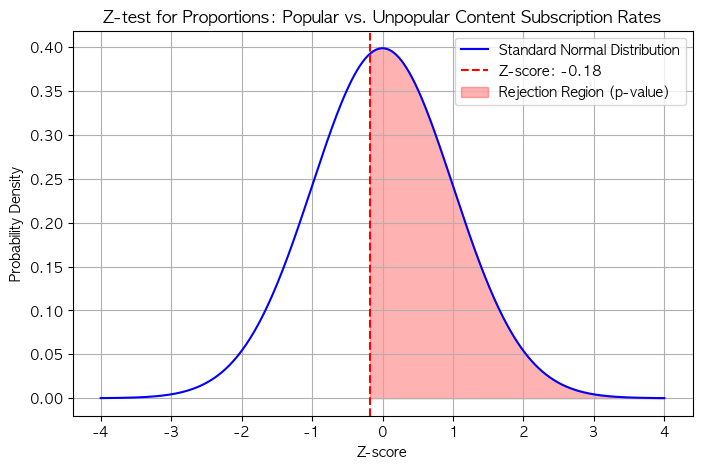

✅ Z-statistic: -0.1826
✅ p-value: 0.5725


In [53]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# 🔹 두 그룹 (인기 콘텐츠 vs 비인기 콘텐츠) 데이터
n1, n2 = len(users_from_popular), len(users_from_unpopular)
subscribed1 = users_from_popular['complete_subscription_time'].apply(lambda x: any(pd.notna(x))).sum()
subscribed2 = users_from_unpopular['complete_subscription_time'].apply(lambda x: any(pd.notna(x))).sum()

# 🔹 Z-test 수행
count = np.array([subscribed1, subscribed2])
nobs = np.array([n1, n2])
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# 🔹 시각화: Z-검정 정규분포 곡선
x = np.linspace(-4, 4, 1000)  # Z-스코어 범위 (-4 ~ 4)
y = stats.norm.pdf(x, 0, 1)   # 평균 0, 표준편차 1인 정규분포
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# 🔹 Z-통계량 위치 표시 (실제 z-score)
plt.axvline(z_stat, color='red', linestyle='--', label=f'Z-score: {z_stat:.2f}')
plt.fill_between(x, y, where=(x >= z_stat), color='red', alpha=0.3, label="Rejection Region (p-value)")

plt.title("Z-test for Proportions: Popular vs. Unpopular Content Subscription Rates")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

plt.show()

# 결과 해석
print(f"✅ Z-statistic: {z_stat:.4f}")
print(f"✅ p-value: {p_value:.4f}")

### 가설 검정 해석
- Z통계량이 -0.18이므로 0 근처에 위치, 인기 콘텐츠와 비인기 콘텐츠의 구독 전환율 차이가 크지 않음
- 유의수준 a=0.05 기준으로 z > 1.96 or z < 1.96일때, 귀무가설 기각 가능.
하지만 Z-score가 -0.18로, 귀무가설을 기각할 수 없음

### 3. OS 사용량 분석 코드

In [39]:
# 모든 OS 데이터를 개별 행으로 변환 (explode 사용)
os_exploded = filtered_grouped_df.explode('os_name_x')

# OS별 사용 빈도수 계산
os_counts = os_exploded['os_name_x'].value_counts().reset_index()
os_counts.columns = ['os_name', 'user_count']

# 결과 출력
display(os_counts)


,os_name,user_count
0,Chrome,38031
1,Edge,6429
2,Mobile Safari,2886
3,Safari,2833
4,Whale,2235
5,Samsung Browser,1681
6,Chrome WebView,1492
7,Chrome Mobile,1317
8,Instagram,511
9,WebKit,486


### 4. 무료 콘텐츠를 처음 수강한 시간과 첫 구독을 누른 시간의 갭 분석

In [41]:
# 'click_start_content_time'과 'complete_subscription_time'에서 처음 발생한 시간만 선택
filtered_grouped_df['first_start_content_time'] = filtered_grouped_df['click_start_content_time'].apply(lambda x: min(x) if isinstance(x, list) and len(x) > 0 else pd.NaT)
filtered_grouped_df['first_subscription_time'] = filtered_grouped_df['complete_subscription_time'].apply(lambda x: min(x) if isinstance(x, list) and len(x) > 0 else pd.NaT)

# 시간 차이 계산 (첫 구독 - 첫 클릭)
filtered_grouped_df['time_to_subscribe'] = filtered_grouped_df.apply(
    lambda row: (row['first_subscription_time'] - row['first_start_content_time']).total_seconds() / 3600 if pd.notna(row['first_subscription_time']) else None, axis=1
)

# 결과 확인 (첫 클릭, 첫 구독, 시간 차이)
display(filtered_grouped_df[['user_id', 'first_start_content_time', 'first_subscription_time', 'time_to_subscribe']])


,user_id,first_start_content_time,first_subscription_time,time_to_subscribe
0,0001435bc6c0c0f05315192f89275425,2023-01-16 10:00:52.580,NaT,NaN
1,0003691a8bc9f96481baa7086ae04592,2022-11-06 20:59:00.162,NaT,NaN
2,0003c0ede663b9e3b55d9dc3f7e8690f,2023-02-08 01:40:05.215,NaT,NaN
3,000634ec5553ca63f77c61690353a0be,2023-05-26 15:06:18.658,NaT,NaN
4,000722d5152d121ef57d8246dff4ac91,2022-12-13 18:54:50.431,NaT,NaN
...,...,...,...,...
24961,fff60192556898a9001de93f8708bedf,2022-11-19 09:40:53.996,NaT,NaN
24962,fff8b3be926adfb193591e262b087b74,2022-03-13 15:49:36.633,NaT,NaN
24963,fffba676b17f9f0f228360930f238f07,2022-06-20 17:42:06.657,NaT,NaN
24964,fffd757f689e039a1d4db0adc1b80b61,2023-01-16 20:11:34.191,NaT,NaN


In [43]:
# 구독한 유저만 필터링
subscribed_users = filtered_grouped_df.dropna(subset=['time_to_subscribe'])

# 구독한 유저 수 계산
num_subscribed_users = len(subscribed_users)

# 평균 구독 전환 시간 계산
average_time_to_subscribe = subscribed_users['time_to_subscribe'].mean()

# 평균 구독 전환 일자 계산
average_days_to_subscribe =  average_time_to_subscribe / 24

print(f"무료 체험 후 첫 결제한 유저 수: {num_subscribed_users}명")
print(f"평균 구독 전환 시간: {average_time_to_subscribe:.2f} 시간")
print(f" 평균 구독 전환 일수: {average_days_to_subscribe:.2f} 일")

무료 체험 후 첫 결제한 유저 수: 7657명
평균 구독 전환 시간: -219.37 시간
 평균 구독 전환 일수: -9.14 일


### 5. 이미 구독을 하고 무료 콘텐츠를 들었다? 복잡하다.양수/음수 time_to_subscribe 데이터 분리 분석

In [ ]:
# 양수 값(정상적인 구독 전환)
positive_time_to_subscribe = filtered_grouped_df[filtered_grouped_df['time_to_subscribe'] >= 0]

# 음수 값(이상한 데이터, 구독이 클릭보다 먼저 기록됨)
negative_time_to_subscribe = filtered_grouped_df[filtered_grouped_df['time_to_subscribe'] < 0]

# 결과 확인
print(f"양수(정상적인) 구독 전환 유저 수: {len(positive_time_to_subscribe)}")
print(f"음수(이상한) 구독 전환 유저 수: {len(negative_time_to_subscribe)}")

양수(정상적인) 구독 전환 유저 수: 2459
음수(이상한) 구독 전환 유저 수: 5198


In [46]:
# 양수 값 평균 (정상적인 구독 전환)
average_positive_time_to_subscribe = positive_time_to_subscribe['time_to_subscribe'].mean()
average_positive_days_to_subscribe = average_positive_time_to_subscribe / 24

# 음수 값 평균 (이상한 데이터)
average_negative_time_to_subscribe = negative_time_to_subscribe['time_to_subscribe'].mean()
average_negative_days_to_subscribe = average_negative_time_to_subscribe / 24

# 결과 출력
print(f"✅ 평균 구독 전환 시간 (양수): {average_positive_time_to_subscribe:.2f} 시간 -> {average_positive_days_to_subscribe:.2f} 일")
print(f"✅ 평균 구독 전환 시간 (음수): {average_negative_time_to_subscribe:.2f} 시간 -> {average_negative_days_to_subscribe:.2f} 일")


✅ 평균 구독 전환 시간 (양수): 567.95 시간 -> 23.66 일
✅ 평균 구독 전환 시간 (음수): -591.82 시간 -> -24.66 일


### 6. 리뷰 클릭수가 많은 콘텐츠가 콘텐츠 시작에 도움을 주나? (학습 전환율 분석)

### 6-1. 데이터 준비
- user_id가 NaN인 행 제거
- content_review_id별 click_count 계산
- 리뷰 클릭 수가 높은 콘텐츠와 낮은 콘텐츠 분류
- click_start_content_time을 datetime으로 변환

In [119]:
# NaN인 user_id 제거
merged_df = merged_df.dropna(subset=['user_id'])

# 콘텐츠별 리뷰 클릭 횟수 계산 (content_id 기준)
click_count = merged_df.groupby('content_id')['click_review_time'].count().reset_index(name='click_count')

# merged_df에 click_count 병합 (콘텐츠별 리뷰 클릭 수 추가)
merged_df = merged_df.merge(click_count, on='content_id', how='left')

# 병합 결과 확인
print(merged_df[['content_id', 'click_review_time', 'click_count']].head())



                         content_id click_review_time  click_count
0  445fac33232adcb3d1cdab7d8a579430               NaT          0.0
1  18992b667be06d6f29ba0008f99d9745               NaT         44.0
2  dfbdae782996c25daed7517b8835f3aa               NaT          0.0
3  a1eeebeb6c307641b75b94a2a1d5b9aa               NaT         62.0
4  7de35a9d8f14c68e5f2a8788dda5f72e               NaT         45.0


In [120]:

# click_start_content_time을 datetime으로 변환
merged_df['click_start_content_time'] = pd.to_datetime(merged_df['click_start_content_time'])

# 상위 25% 리뷰 클릭 수를 "인기 콘텐츠", 하위 25% 리뷰 클릭 수를 "비인기 콘텐츠"로 분류
high_clicks = merged_df['click_count'].quantile(0.25)
low_clicks = merged_df['click_count'].quantile(0.75)

merged_df['content_review_popularity'] = np.where(merged_df['click_count'] >= low_clicks, 'High Clicks',
                                np.where(merged_df['click_count'] <= high_clicks, 'Low Clicks', 'Medium Clicks'))

print(merged_df['content_review_popularity'].value_counts())

content_review_popularity
Medium Clicks    60030
High Clicks      34352
Low Clicks       33578
Name: count, dtype: int64


### 6-2. 리뷰 클릭 수가 높은 콘텐츠와 낮은 콘텐츠의 분포 비교
- 클릭 수가 많다고 콘텐츠 시작 확률이 높다고 볼 수 없음

6-2-1.유저별 콘텐츠 리뷰 클릭 횟수 보기

In [136]:
# 유저별 + 콘텐츠별 리뷰 클릭 횟수 계산
user_content_clicks = merged_df.groupby(['user_id', 'content_id'])['click_review_time'].count().reset_index(name='click_count')
user_content_clicks = user_content_clicks.sort_values(by='click_count', ascending=False)

display(user_content_clicks.head())

,user_id,content_id,click_count
69180,cb07a8015b8292cb8fac531c0efb58bc,afe201c04b426366e0f8e9e2207c78c2,54
72325,d356f962902b05588a02a16a60fc167e,ecde9a1b01763f791c3a185d53b5f394,23
58005,a992106c67684123d8e27431ecb3687a,f491517f4737a60d661cd1fcacc702c0,23
3812,0ad15c951f0eb707b00e1cb3c99ba834,1ccd38c0253604fb48f78970736f915c,19
58156,aa02a721c68a03864b5446500d7296bd,f491517f4737a60d661cd1fcacc702c0,17


In [ ]:
# 유저별 총 리뷰 클릭 횟수 (중복 포함)
user_total_clicks = merged_df.groupby('user_id')['click_review_time'].count().reset_index(name='total_clicks')

# 유저별 총 리뷰 클릭 횟수를 내림차순 정렬
user_total_clicks_sorted = user_total_clicks.sort_values(by='total_clicks', ascending=False)

display(user_total_clicks_sorted.head(10)) 



,user_id,total_clicks
27770,cb07a8015b8292cb8fac531c0efb58bc,57
23272,a992106c67684123d8e27431ecb3687a,23
28912,d356f962902b05588a02a16a60fc167e,23
1484,0ad15c951f0eb707b00e1cb3c99ba834,20
23331,aa02a721c68a03864b5446500d7296bd,17
12045,57542a51e6d83e2a11fd6f35224067d7,16
34082,f8868b5573dc20f97a1c65b25a02b7fb,15
14361,6890a14a8d65d6587efc541bfe15ce88,13
31584,e6f768c8264227798f9ec6c65a7263bc,13
13157,5f96e0ec35112c6b0a76ea51f1e89700,13


6-2-2. 유저별 클릭한 고유 콘텐츠 갯수

In [125]:
# 유저별 고유한 콘텐츠 개수 계산
unique_content_per_user = user_content_clicks.groupby('user_id')['content_id'].nunique().reset_index(name='unique_content_count')

# 결과 확인
display(unique_content_per_user.head())


,user_id,unique_content_count
0,0001435bc6c0c0f05315192f89275425,1
1,0001f15911b404f3bf5b8571afafa4e4,1
2,0003691a8bc9f96481baa7086ae04592,1
3,0003c0ede663b9e3b55d9dc3f7e8690f,4
4,000634ec5553ca63f77c61690353a0be,1


NameError: name 'ax' is not defined

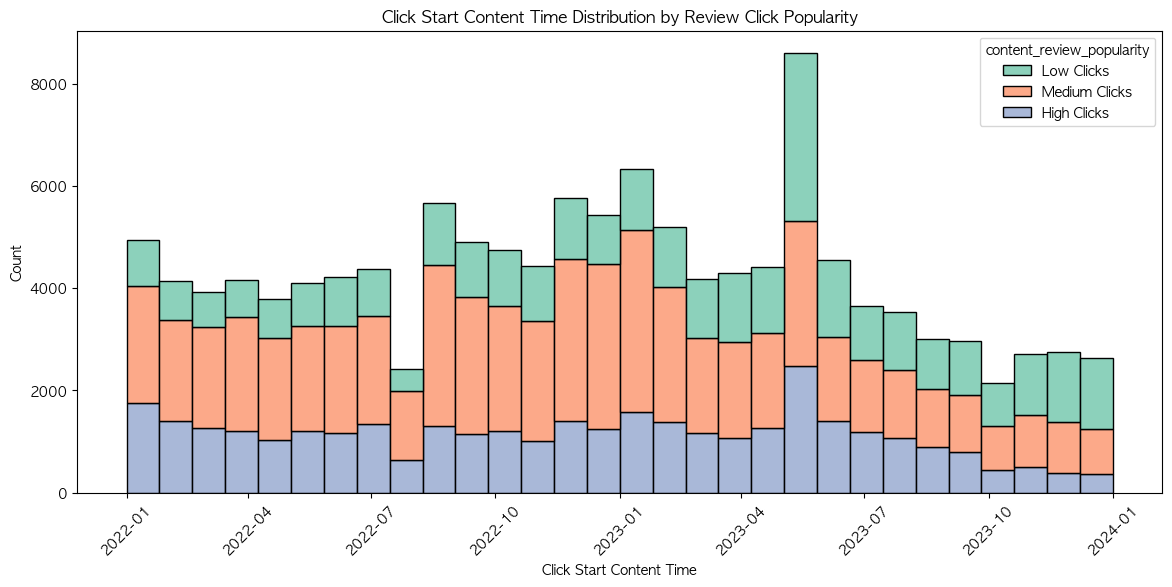

In [ ]:
plt.figure(figsize=(14, 6))

# 히스토그램을 누적형(스택형)으로 표시
sns.histplot(data=merged_df, 
             x='click_start_content_time', 
             hue='content_review_popularity', 
             kde=False,  
             bins=30,  
             multiple='stack',  
             palette="Set2")  

plt.title('Click Start Content Time Distribution by Review Click Popularity')
plt.xlabel('Click Start Content Time')
plt.ylabel('Count')

plt.xticks(rotation=45)

ax.legend(title='Content Popularity', loc='upper right')

plt.show()



### 6-3. 리뷰 클릭 많이 한 유저와 적게 한 유저의 첫 결제 전환율을 보자

In [140]:
print(user_content_clicks.columns)

Index(['user_id', 'total_clicks'], dtype='object')


In [141]:
# 유저별 총 리뷰 클릭 횟수 계산
user_content_clicks = user_content_clicks.groupby('user_id')['total_clicks'].sum().reset_index(name='total_clicks')

# 상위 50%와 하위 50%를 기준으로 구분
median_clicks = user_total_clicks['total_clicks'].median()

# 클릭이 많은 유저(True) vs. 적은 유저(False)
user_total_clicks['high_click_user'] = user_total_clicks['total_clicks'] > median_clicks

click_group_summary = user_total_clicks.groupby('high_click_user').agg(
    total_users=('user_id', 'count')
).reset_index()

# 결과 확인
display(click_group_summary.head())


,high_click_user,total_users
0,False,33894
1,True,1212


In [142]:
# 첫 결제 여부 확인 (결제한 경우 True, 안 한 경우 False)
merged_df['first_payment'] = merged_df['complete_subscription_time'].notnull()

# 유저별 클릭 그룹 정보 추가 (high_click_user 컬럼 추가)
merged_df = merged_df.merge(user_total_clicks[['user_id', 'high_click_user']], on='user_id', how='left')

# 결과 확인
display(merged_df[['user_id', 'high_click_user', 'first_payment']].head())


,user_id,high_click_user,first_payment
0,41362ad5ebcade2bb1b78344a53e7ccf,False,True
1,f7155af01d277f11b1c7d05cf772c686,False,True
2,1b05f9fe82b80771323caa1cd5683143,False,False
3,353528475f2bd85934263421ccd579b3,True,True
4,353528475f2bd85934263421ccd579b3,True,True


In [160]:
# 결제한 유저만 필터링
paid_users = merged_df[merged_df['first_payment'] == True]

# 리뷰 클릭 후 첫 결제까지 걸린 시간 계산
paid_users['time_to_payment'] = (paid_users['complete_subscription_time'] - paid_users['click_review_time']).dt.total_seconds() / 3600  # 시간 단위로 변환

# 결과 확인
display(paid_users[['user_id', 'click_review_time', 'complete_subscription_time', 'time_to_payment']].head())

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_25392/3221251743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_users['time_to_payment'] = (paid_users['complete_subscription_time'] - paid_users['click_review_time']).dt.total_seconds() / 3600  # 시간 단위로 변환


,user_id,click_review_time,complete_subscription_time,time_to_payment
0,41362ad5ebcade2bb1b78344a53e7ccf,NaT,2022-06-23 17:07:25.279,NaN
1,f7155af01d277f11b1c7d05cf772c686,NaT,2023-03-12 18:04:27.409,NaN
3,353528475f2bd85934263421ccd579b3,NaT,2023-04-03 08:20:01.495,NaN
4,353528475f2bd85934263421ccd579b3,NaT,2023-04-03 08:20:01.495,NaN
5,f853aa18605bd7f11162236b6b8ac4c5,NaT,2023-03-22 23:46:24.913,NaN


In [147]:

# 리뷰 클릭이 많은 유저 여부 기준으로 그룹화
click_groups = paid_users.groupby('high_click_user')['time_to_payment'].agg(
    mean_time=('mean'),  # 평균 결제까지 걸린 시간
    median_time=('median'),  # 중앙값 (대표적인 결제 속도)
    min_time=('min'),  # 최소값 (가장 빠른 결제)
    max_time=('max')  # 최대값 (가장 늦은 결제)
).reset_index()

# 결과 확인
display(click_groups)


,high_click_user,mean_time,median_time,min_time,max_time
0,False,NaN,NaN,NaN,NaN
1,True,-668.378777,-145.750365,-13260.864649,10229.80839


### 유저가 첫 결제를 먼저 하고 리뷰를 클릭한 경우가 더 많은 것 같음 ㅠㅠ

### 리뷰 클릭하고 결제한 유저들만 분석해보자

In [161]:
# 리뷰 클릭 후 결제한 데이터만 필터링 (이상값 제거)
review_before_payment_users = paid_users[paid_users['click_review_time'] <= paid_users['complete_subscription_time']]

# 다시 결제까지 걸린 시간 계산
review_before_payment_users['time_to_payment'] = (review_before_payment_users['complete_subscription_time'] - review_before_payment_users['click_review_time']).dt.total_seconds() / 3600  # 시간 단위

# 평균 결제 소요 시간 계산 (리뷰 클릭 후 결제까지 걸린 시간)
average_payment_time = review_before_payment_users['time_to_payment'].mean()

# 총 유저 수 계산 (중복 제거)
total_users = review_before_payment_users['user_id'].nunique()

print(f"평균 결제 소요 시간: {average_payment_time:.2f} 시간")
print(f"총 유저 수: {total_users} 명")



평균 결제 소요 시간: 576.42 시간
총 유저 수: 162 명


/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_25392/1323249744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_before_payment_users['time_to_payment'] = (review_before_payment_users['complete_subscription_time'] - review_before_payment_users['click_review_time']).dt.total_seconds() / 3600  # 시간 단위


### 결제를 하고 리뷰를 본 유저들을 보자

In [162]:
# 결제 후 리뷰를 본 유저 필터링
review_after_payment_users = paid_users[paid_users['click_review_time'] > paid_users['complete_subscription_time']]


display(review_after_payment_users[['user_id', 'click_review_time', 'complete_subscription_time']].head())

# 결제 후 리뷰 본 유저 수
total_after_payment_users = review_after_payment_users['user_id'].nunique()
print(f"결제 후 리뷰를 클릭한 유저 수: {total_after_payment_users} 명")


,user_id,click_review_time,complete_subscription_time
12,79421b5d038205ad7adbb1e2c3b89741,2023-04-06 22:37:59.913,2023-03-12 17:46:14.026
70,db63522b02cd08584e5e1df2836b21cc,2023-02-02 11:54:11.516,2023-01-10 23:49:20.420
319,c08e32271d96bd91f8626c49f91e9fc3,2023-04-02 13:29:06.838,2022-11-22 20:33:52.443
405,11513e927f01a9ce44af5c4730ceac88,2023-02-09 23:54:22.169,2023-01-31 19:40:10.114
753,8e60aad933c36f62252053edbf665b33,2023-08-14 18:42:34.802,2022-11-22 21:42:01.562


결제 후 리뷰를 클릭한 유저 수: 407 명


In [ ]:
# 구독한 유저만 필터링
subscribed_users = filtered_grouped_df.dropna(subset=['time_to_subscribe'])

# 구독한 유저 수 계산
num_subscribed_users = len(subscribed_users)

# 평균 구독 전환 시간 계산
average_time_to_subscribe = subscribed_users['time_to_subscribe'].mean()

# 평균 구독 전환 일자 계산
average_days_to_subscribe =  average_time_to_subscribe / 24

print(f"무료 체험 후 첫 결제한 유저 수: {num_subscribed_users}명")
print(f"평균 구독 전환 시간: {average_time_to_subscribe:.2f} 시간")
print(f" 평균 구독 전환 일수: {average_days_to_subscribe:.2f} 일")

무료 체험 후 첫 결제한 유저 수: 7657명
평균 구독 전환 시간: -219.37 시간
 평균 구독 전환 일수: -9.14 일


In [144]:
# 클릭 그룹별 첫 결제 전환율 계산
review_first_payment_conversion_rates = merged_df.groupby('high_click_user')['first_payment'].mean().reset_index(name='conversion_rate')

# 결과 확인
display(review_first_payment_conversion_rates)


,high_click_user,conversion_rate
0,False,0.383369
1,True,0.553863


In [145]:
# 클릭 그룹별 유저 수, 결제한 유저 수, 전환율 계산
conversion_summary = merged_df.groupby('high_click_user').agg(
    total_users=('user_id', 'nunique'),
    total_payers=('first_payment', 'sum'),  
    conversion_rate=('first_payment', 'mean') 
).reset_index()

# 결과 확인
display(conversion_summary)


,high_click_user,total_users,total_payers,conversion_rate
0,False,33894,44878,0.383369
1,True,1212,6036,0.553863


### 아래는 분석 망한 코드들. 👇🏻

### 6-3. 학습 전환율 계산하기
- 클릭 수가 매우 적고 전환율이 높은 것으로 보아 다음과 같이 해석할 수 있음 </br>
1. 사람들이 리뷰를 클릭하지 않고 바로 구독을 할 수 있음 -> 신규 유저와 재구독 유저로 비교할 수 있나?</br>
2. 클릭수 자체가 너무 적어서 분석하는게 의미가 없을 수도 있음</br>

In [164]:
# 콘텐츠별 클릭 대비 학습 전환율 계산
conversion_rate = merged_df.groupby('content_review_popularity').agg(
    total_clicks=('click_review_time', 'count'),  # 리뷰 버튼을 누른 횟수
    total_starts=('click_start_content_time', lambda x: x.notnull().sum())  # 실제 학습을 시작한 횟수
).reset_index()

# 학습 전환율 (학습 시작 수 / 리뷰 클릭 수)
conversion_rate['conversion_rate'] = conversion_rate['total_starts'] / conversion_rate['total_clicks']

# 결과 출력
print(conversion_rate)


  content_review_popularity  total_clicks  total_starts  conversion_rate
0               High Clicks           849         34352        40.461720
1                Low Clicks           315         33578       106.596825
2             Medium Clicks          1430         60030        41.979021


### 6-4. 그렇다면 리뷰를 확인한 유저와 아닌 유저의 학습 전환율은 다를까? [유저당 학습 전환율]

In [ ]:
# 리뷰를 클릭한 유저 여부 확인 (True = 리뷰 클릭한 유저, False = 리뷰 클릭 안 한 유저)
merged_df['review_clicked'] = merged_df['click_review_time'].notnull()

# 그룹별 학습 전환율 계산
conversion_by_review = merged_df.groupby('review_clicked').agg(
    total_users=('user_id', 'nunique'),  # 유니크 유저 수
    total_starts=('click_start_content_time', lambda x: x.notnull().sum())  # 학습 시작 수
).reset_index()

# 학습 전환율 추가 (학습 시작 수 / 전체 유저 수)
conversion_by_review['conversion_rate'] = conversion_by_review['total_starts'] / conversion_by_review['total_users']

# 결과 출력
print(conversion_by_review)

# 전환율이 1을 넘으면 안되는데 이상하게 나옴
# 한 유저가 여러 콘텐츠를 클릭하고 학습을 시작할 수 있기 때문에 전환율이 1을 넘을 수 있는 것으로 추측

   review_clicked  total_users  total_starts  conversion_rate
0           False        34819        125366         3.600505
1            True         1212          2594         2.140264


### 6-5. 리뷰 클릭 수와 콘텐츠 시작 간 상관관계 분석
- 결과가 이상함.. 여기서부터 꼬이기시작. 해결 불가..

Click Count vs. Click Start Content Time Correlation:
                           click_count  click_start_content_time
click_count                       1.0                       1.0
click_start_content_time          1.0                       1.0


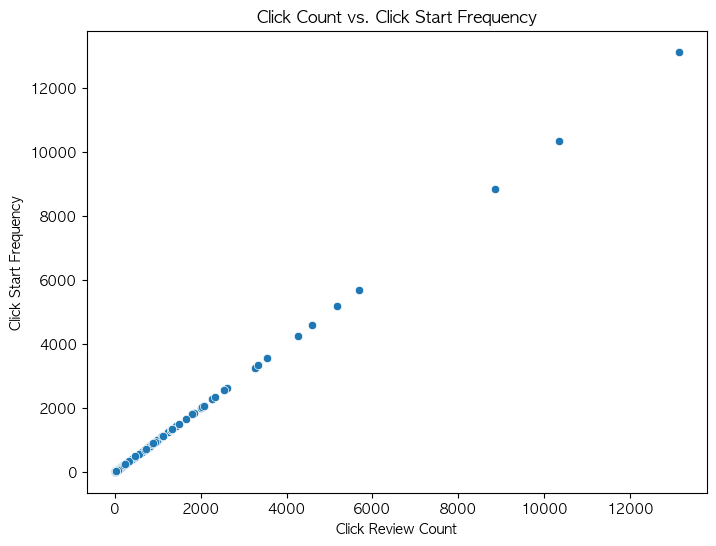

In [88]:
# 콘텐츠별 평균 시작 시간 계산 (콘텐츠 클릭 횟수 대비 시작 시간)
content_start_time_mean = merged_df.groupby('content_id')['click_start_content_time'].count().reset_index()
content_start_time_mean = content_start_time_mean.merge(click_counts, on='content_id')

# 상관계수 계산
correlation = content_start_time_mean[['click_count', 'click_start_content_time']].corr()
print("Click Count vs. Click Start Content Time Correlation:\n", correlation)

# 시각화 - 클릭 수 vs. 콘텐츠 시작 횟수
plt.figure(figsize=(8,6))
sns.scatterplot(data=content_start_time_mean, x='click_count', y='click_start_content_time')
plt.title('Click Count vs. Click Start Frequency')
plt.xlabel('Click Review Count')
plt.ylabel('Click Start Frequency')
plt.show()


### 6-6. 가설 주제
- 귀무가설: 리뷰 클릭 수가 많은 콘텐츠여도 유저가 콘텐츠를 시작할 확률이 증가하지 않는다.
- 대립가설: 리뷰 클릭 수가 많은 콘텐츠일수록 유저가 콘텐츠를 시작할 확률이 증가한다.
- t-test 독립표본, 카이제곱 검정 시행

In [103]:
# High Clicks와 Low Clicks에 해당하는 데이터 추출
high_clicks_df = merged_df[merged_df['content_review_popularity'] == 'High Clicks']
low_clicks_df = merged_df[merged_df['content_review_popularity'] == 'Low Clicks']

# High Clicks와 Low Clicks 그룹의 학습 시작 비율 계산
high_clicks_conversion_rate = high_clicks_df['click_start_content_time'].notnull().sum() / high_clicks_df.shape[0]
low_clicks_conversion_rate = low_clicks_df['click_start_content_time'].notnull().sum() / low_clicks_df.shape[0]

# 결과 출력
print(f"✅ High Clicks 그룹의 학습 전환율: {high_clicks_conversion_rate:.4f}")
print(f"✅ Low Clicks 그룹의 학습 전환율: {low_clicks_conversion_rate:.4f}")

# 비교 결과 출력
if high_clicks_conversion_rate > low_clicks_conversion_rate:
    print("✅ High Clicks 그룹이 Low Clicks 그룹보다 학습 시작 확률이 높습니다.")
elif high_clicks_conversion_rate < low_clicks_conversion_rate:
    print("✅ Low Clicks 그룹이 High Clicks 그룹보다 학습 시작 확률이 높습니다.")
else:
    print("⚠️ 두 그룹의 학습 시작 확률이 동일합니다.")



✅ High Clicks 그룹의 학습 전환율: 1.0000
✅ Low Clicks 그룹의 학습 전환율: 1.0000
⚠️ 두 그룹의 학습 시작 확률이 동일합니다.


In [101]:
# 등분산 검정 수행
from scipy.stats import levene

# 등분산 검정 수행
stat, p = levene(high_clicks, low_clicks)

print(f"Levene’s test 결과: statistic={stat}, p-value={p}")

# p-value < 0.05이면 등분산이 아님 (즉, equal_var=False가 적절)
if p < 0.05:
    print("⚠️ 두 그룹의 분산이 유의미하게 다릅니다. (equal_var=False 사용 권장)")
else:
    print("✅ 두 그룹의 분산 차이가 유의하지 않습니다. (equal_var=True 사용 가능)")


Levene’s test 결과: statistic=nan, p-value=nan
✅ 두 그룹의 분산 차이가 유의하지 않습니다. (equal_var=True 사용 가능)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_morestats.py:3057: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [99]:
# 필요한 라이브러리 불러오기
from scipy.stats import ttest_ind

# High Clicks 그룹과 Low Clicks 그룹의 시작 비율 비교
high_clicks = merged_df[merged_df['content_review_popularity'] == 'high_clicks']['click_start_content_time'].notnull().astype(int)
low_clicks = merged_df[merged_df['content_review_popularity'] == 'low_clicks']['click_start_content_time'].notnull().astype(int)

# t-test 수행
t_stat, p_value = ttest_ind(high_clicks, low_clicks, equal_var=False)

print(f"T-test 결과: t-statistic={t_stat}, p-value={p_value}")

# 유의 수준 0.05를 기준으로 해석
if p_value < 0.05:
    print("p-value가 0.05보다 작으므로 클릭 수가 많은 콘텐츠일수록 시작 확률이 높다는 대립가설을 채택할 수 있다")
else:
    print("p-value가 0.05보다 크므로 클릭 수가 콘텐츠 시작에 미치는 영향이 유의미하지 않다.")

# 값이 왜 nan?......


T-test 결과: t-statistic=nan, p-value=nan
p-value가 0.05보다 크므로 클릭 수가 콘텐츠 시작에 미치는 영향이 유의미하지 않다.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### 번외 1. 유저 아이디별로 콘텐츠 클릭

In [92]:
# 한 유저당 콘텐츠 클릭 수 
user_content_count = user_content_ids_filtered.groupby('user_id')['content_id'].nunique().sort_values(ascending=False)
user_content_count

user_id
3bc001ca42b22a7446687c3d183af0cd    66
6421bf3808b89da97f316eac07da2b91    59
caec8b3be818f1408e0d47d89acc245f    55
d2691bedf9ae0bc97a182e57361bdeb8    54
38410d6be64b42c85ed796fbe9e3d368    51
                                    ..
6df6a322c618f8fa9413dd050a85c71f     1
6df49741ff96dfada8cde7a8c1ec4d54     1
6dec728300e7f49f04d02fdae3b7ae71     1
6deba6d26a6a07c2d16ed54498b0fbf9     1
7fb5dcf84ccc668104e1d8aba8fef8f8     1
Name: content_id, Length: 35096, dtype: int64

# 7. enter.payment_page
- 결제 페이지 진입

In [9]:
enter_payment = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.payment_page.csv')
enter_payment.drop(columns=['device_carrier'], inplace=True)
enter_payment.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602000,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699000,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337000,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935000,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632000,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


In [58]:
enter_payment.isna().sum()

city                 2699
client_event_time       0
country               162
device_family           1
device_type          5995
event_type              0
language                0
os_name                 0
os_version            501
platform                0
user_id              6227
dtype: int64

In [61]:
# 'client_event_time'을 datetime 형식으로 변환
enter_payment['client_event_time'] = pd.to_datetime(enter_payment['client_event_time'], errors='coerce')

# 날짜만 추출
enter_payment['date'] = enter_payment['client_event_time'].dt.to_period('M')

# `user_id`가 NaN인 데이터만 필터링
null_user_data = enter_payment[enter_payment['user_id'].isna()]

# 날짜별 `NaN user_id` 개수 집계
null_user_counts = null_user_data.groupby('date').size()

# 결과 출력
display(null_user_counts)


date
2022-11      45
2022-12     151
2023-01     231
2023-02     963
2023-03     146
2023-04     106
2023-05     154
2023-06     327
2023-07     650
2023-08     573
2023-09     795
2023-10     889
2023-11    1032
2023-12     165
Freq: M, dtype: int64

# 구독 퍼널 전환률 분석
- 이탈하지 않고 강의 수강하는 유저 /첫 결제한 유저들
- 정기구독 + 재구독한 유저들/수강 이탈하지 않은 유저들
- 합쳐야할 데이터셋: 8번, 9번, 10번, 13번, 14번

## 1.첫 결제 데이터 불러오기

In [5]:
complete_subscription = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/complete.subscription.csv')
complete_subscription.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
complete_subscription.rename(columns={'client_event_time': 'complete_subscription_time'}, inplace=True)
complete_subscription.drop(complete_subscription[complete_subscription['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
complete_subscription['complete_subscription_time'] = pd.to_datetime(complete_subscription['complete_subscription_time'])

# 9시간 추가 (UTC+9 적용)
complete_subscription['complete_subscription_time'] = complete_subscription['complete_subscription_time'] + pd.Timedelta(hours=9)

# 시간 필터링
complete_subscription = complete_subscription.loc[
    complete_subscription['complete_subscription_time'].dt.year.between(2022, 2023)]

# 컬럼명 수정하기
complete_subscription.rename(columns={'plan.price': 'plan_price', 'pg.type': 'pg_type'}, inplace=True)
complete_subscription.head()

,city,complete_subscription_time,country,device_type,event_type,language,os_name,user_id,plan_price,paid_amount,coupon.discount_amount,pg_type
0,Nowon-gu,2023-04-06 06:40:04.000,South Korea,Windows,complete.subscription,Korean,Edge,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 23:20:03.008,South Korea,Apple iPhone,complete.subscription,Korean,Mobile Safari,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 17:46:14.026,South Korea,Windows,complete.subscription,Korean,Chrome,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 20:35:01.865,South Korea,Windows,complete.subscription,Korean,Chrome,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 10:25:55.820,South Korea,Mac,complete.subscription,Korean,Chrome,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


### 1-1. 첫 결제 데이터 전처리

In [6]:
complete_subscription = complete_subscription.drop_duplicates(subset=['user_id'], keep='first')
complete_subscription['user_id'].nunique()

13875

### 1-2. 분기별로 회원가입 유저 중 첫 결제한 유저 확인하기

In [117]:
# 분기 정보
complete_subscription["quarter"] = complete_subscription["complete_subscription_time"].dt.to_period("Q")

# 분기별 유저 수 계산
quarterly_user_count = complete_subscription.groupby("quarter")["user_id"].nunique()

# 결과 출력
print(quarterly_user_count)

quarter
2022Q1    1201
2022Q2    1729
2022Q3    1324
2022Q4    2326
2023Q1    1990
2023Q2    1494
2023Q3    1898
2023Q4    1913
Freq: Q-DEC, Name: user_id, dtype: int64


### 1-3. 첫 결제 유저 아이디 리스트 만들기

In [31]:
# 첫 결제 유저아이디 리스트 만들기
first_payment_user_id_list = complete_subscription['user_id'].dropna().unique()
unique_first_payment_user_ids = len(first_payment_user_id_list)
print(f" 첫 결제 유저 수: {unique_first_payment_user_ids}")

 첫 결제 유저 수: 13875


In [33]:
print(type(first_payment_user_id_list))

<class 'numpy.ndarray'>


In [38]:
first_payment_user_id_list

array(['1116a2ae90ca6b06f85feba27ad51ef0',
       'c0f5678df8967163e6e2c464ed006791',
       '79421b5d038205ad7adbb1e2c3b89741', ...,
       'abebe3234041d14b5c0c5821bf90ab26',
       '3ca22b0bade6b40d6274bf6d06bc4344',
       'c49ea18247c81a613f8bbf44ff029cb4'], shape=(13875,), dtype=object)

## 2. Complete_lesson 데이터 불러오기

In [8]:
complete_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/complete.lesson.csv')
complete_lesson.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
complete_lesson.rename(columns={'client_event_time': 'complete_lesson_time'}, inplace=True)
complete_lesson.drop(complete_lesson[complete_lesson['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
complete_lesson['complete_lesson_time'] = pd.to_datetime(complete_lesson['complete_lesson_time'])

# 9시간 추가 (UTC+9 적용)
complete_lesson['complete_lesson_time'] = complete_lesson['complete_lesson_time'] + pd.Timedelta(hours=9)

# 시간 필터링
complete_lesson = complete_lesson.loc[
    complete_lesson['complete_lesson_time'].dt.year.between(2022, 2023)]

# 컬럼명 수정하기
complete_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
complete_lesson.head()

,city,complete_lesson_time,country,device_type,event_type,language,os_name,user_id,content_id,lesson_id
0,Wonju,2023-04-06 06:55:51.836,South Korea,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-06 06:19:01.243,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-06 06:20:27.939,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-06 06:23:01.534,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-06 06:28:34.965,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


### 2-1. 레슨 완료한 데이터에서 중복되는 타임스탬프 분석

In [95]:
# 유저별 시간 기준 정렬 후 시간 차이 계산
complete_lesson_sorted = complete_lesson.sort_values(
    by=['user_id', 'complete_lesson_time'], ascending=True
)

# 시간 차이 계산 (단위: 초)
complete_lesson_sorted["time_diff_seconds"] = (
    complete_lesson_sorted.groupby('user_id')['complete_lesson_time']
    .diff()
    .dt.total_seconds())  # 초 단위로 변환

In [10]:
# 유저별 시간 기준 정렬 후 시간 차이 계산
complete_lesson_sorted = complete_lesson.sort_values(
    by=['user_id', 'complete_lesson_time'], ascending=True
)

# 시간 차이 계산 (단위: 초)
complete_lesson_sorted["time_diff_seconds"] = (
    complete_lesson_sorted.groupby('user_id')['complete_lesson_time']
    .diff()
    .dt.total_seconds()  # 초 단위로 변환
)


### 2-2. 전처리 작업

In [15]:
complete_lesson_filtered = complete_lesson_sorted[complete_lesson_sorted["time_diff_seconds"] > 30]
print("타임 디프 필터링", len(complete_lesson_filtered))

타임 디프 필터링 4502312


In [16]:
complete_lesson_filtered["complete_lesson_time_trimmed"] = complete_lesson_filtered["complete_lesson_time"].dt.strftime('%Y-%m-%d %H:%M')
complete_lesson_finalised = complete_lesson_filtered.drop_duplicates(
    subset=["user_id", "complete_lesson_time_trimmed"], keep="first"
)
print("시:분 단위 중복 제거 완료. 남은 데이터 개수:", len(complete_lesson_finalised))

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_1010/3681533115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_lesson_filtered["complete_lesson_time_trimmed"] = complete_lesson_filtered["complete_lesson_time"].dt.strftime('%Y-%m-%d %H:%M')


시:분 단위 중복 제거 완료. 남은 데이터 개수: 4427700


In [99]:
print(len(complete_lesson)) # 원본 데이터에서 레슨 아이디, 콘텐츠 아이디, 타임스탬프 동일한 중복값 제거 
print(len(complete_lesson_filtered)) # 30초 이상 데이터만 필터링
print(len(complete_lesson_finalised)) # 시, 분단위 중복 제거 완료

5404242
4502312
4427700


In [42]:
complete_lesson_finalised['user_id']

1199632    0000572f2ba8079bcefd2760b632e820
222217     0000572f2ba8079bcefd2760b632e820
222218     0000572f2ba8079bcefd2760b632e820
222219     0000572f2ba8079bcefd2760b632e820
222220     0000572f2ba8079bcefd2760b632e820
                         ...               
4793606    fffe529de03d6187ef7ed765650c8d2b
4546569    fffe529de03d6187ef7ed765650c8d2b
4145717    fffe529de03d6187ef7ed765650c8d2b
5013938    fffe529de03d6187ef7ed765650c8d2b
3873776    fffe529de03d6187ef7ed765650c8d2b
Name: user_id, Length: 4427700, dtype: object

In [43]:
# complete_lesson_finalised['user_id']도 문자열(str)로 변환
complete_lesson_finalised['user_id'] = complete_lesson_finalised['user_id'].astype(str)

# 필터링 수행
first_paid_complete_lesson = complete_lesson_finalised[complete_lesson_finalised['user_id'].isin(first_payment_user_id_list)]

print("첫 결제 유저 필터링 개수:", len(first_paid_complete_lesson))
display(first_paid_complete_lesson)

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_1010/2220122927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_lesson_finalised['user_id'] = complete_lesson_finalised['user_id'].astype(str)


첫 결제 유저 필터링 개수: 1860818


,city,complete_lesson_time,country,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff_seconds,complete_lesson_time_trimmed
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,134.017,2023-03-19 00:53
222217,Seoul,2023-03-19 01:00:32.081,South Korea,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,ce99776e0779bc82754a1fc8bfb719d1,403.351,2023-03-19 01:00
222218,Seoul,2023-03-19 01:04:54.296,South Korea,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,eb40ff18855f20f7cd2d55dbc48b49ae,262.215,2023-03-19 01:04
222219,Seoul,2023-03-19 01:18:28.265,South Korea,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,c84ce096d3407c9ce4eebd380df44dbf,813.969,2023-03-19 01:18
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,283.050,2023-03-19 01:23
...,...,...,...,...,...,...,...,...,...,...,...,...
3920427,Guro-gu,2023-10-01 23:07:38.805,South Korea,Samsung Galaxy S22 Ultra,complete.lesson,Korean,Whale,fffadab35ddc8234e1c5139815bfc017,b314d5aba64a0aab40602cb72a4a1504,fb8ad75011508f64bb3a345f0573ff3d,94281.679,2023-10-01 23:07
4966005,Suwon,2023-10-02 22:51:21.160,South Korea,Windows,complete.lesson,Korean,Chrome,fffadab35ddc8234e1c5139815bfc017,b314d5aba64a0aab40602cb72a4a1504,db8479765de5fa6f2c52e9eef67b8b23,85422.355,2023-10-02 22:51
5037343,Gangnam-gu,2023-10-03 11:13:48.778,South Korea,Samsung Galaxy S22 Ultra,complete.lesson,Korean,Whale,fffadab35ddc8234e1c5139815bfc017,b314d5aba64a0aab40602cb72a4a1504,429b2776aef9c7e03d9994d159b835de,44547.618,2023-10-03 11:13
4517644,Eunpyeong-gu,2023-10-05 01:00:32.532,South Korea,Samsung Galaxy S22 Ultra,complete.lesson,Korean,Chrome WebView,fffadab35ddc8234e1c5139815bfc017,b314d5aba64a0aab40602cb72a4a1504,d232134caf8d44f4559e0313183b73a7,136003.754,2023-10-05 01:00


## 3. enter_lesson_page 첫 결제 유저로 필터링

In [4]:
enter_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.lesson_page.csv')
enter_lesson.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
enter_lesson.rename(columns={'client_event_time': 'enter_lesson_time','content.id':'content_id','lesson.id':'lesson_id'}, inplace=True)
enter_lesson.drop(enter_lesson[enter_lesson['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
enter_lesson['enter_lesson_time'] = pd.to_datetime(
    enter_lesson['enter_lesson_time'], errors='coerce'
)

# 9시간 추가 (UTC+9 적용)
enter_lesson['enter_lesson_time'] = enter_lesson['enter_lesson_time'] + pd.Timedelta(hours=9)

# 시간 필터링
enter_lesson = enter_lesson.loc[
    enter_lesson['enter_lesson_time'].dt.year.between(2022, 2023)]

print("원본 데이터 갯수", len(enter_lesson))


/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_1010/3569356846.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.lesson_page.csv')


원본 데이터 갯수 21028196


### 3-1. 전처리 작업

In [17]:
# 유저별 시간 기준 정렬 후 시간 차이 계산
enter_lesson = enter_lesson.sort_values(
    by=['user_id', 'enter_lesson_time'], ascending=True
)

# 시간 차이 계산 (단위: 초)
enter_lesson["time_diff_seconds"] = (
    enter_lesson.groupby('user_id')['enter_lesson_time']
    .diff()
    .dt.total_seconds() 
)

enter_lesson_filtered = enter_lesson[enter_lesson["time_diff_seconds"] > 30]
print("time_diff 필터링 개수:", len(enter_lesson_filtered))

time_diff 필터링 개수: 8118190


In [37]:
enter_lesson_filtered["enter_lesson_time_trimmed"] = enter_lesson_filtered["enter_lesson_time"].dt.strftime('%Y-%m-%d %H:%M')
enter_lesson_finalised = enter_lesson_filtered.drop_duplicates(
    subset=["user_id", "enter_lesson_time_trimmed"], keep="first"
)
print("시:분 단위 중복 제거 완료. 남은 데이터 개수:", len(enter_lesson_finalised))

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_1010/1153945839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enter_lesson_filtered["enter_lesson_time_trimmed"] = enter_lesson_filtered["enter_lesson_time"].dt.strftime('%Y-%m-%d %H:%M')


시:분 단위 중복 제거 완료. 남은 데이터 개수: 7852494


In [39]:
enter_lesson_finalised['user_id']

16137       0000572f2ba8079bcefd2760b632e820
16138       0000572f2ba8079bcefd2760b632e820
16139       0000572f2ba8079bcefd2760b632e820
16140       0000572f2ba8079bcefd2760b632e820
16141       0000572f2ba8079bcefd2760b632e820
                          ...               
19123441    ffffd8d78865a66cb3706977f29d1dec
20701374    ffffd8d78865a66cb3706977f29d1dec
20701375    ffffd8d78865a66cb3706977f29d1dec
14413283    ffffd8d78865a66cb3706977f29d1dec
14413285    ffffd8d78865a66cb3706977f29d1dec
Name: user_id, Length: 7852494, dtype: object

In [ ]:
# first_payment_user_id_list를 리스트로 변환
first_payment_user_id_list = first_payment_user_id_list.tolist()  # numpy.ndarray → list 변환

# 리스트 내 모든 값을 문자열(str)로 변환
first_payment_user_id_list = [str(x) for x in first_payment_user_id_list]

# enter_lesson_finalised['user_id']도 문자열(str)로 변환
enter_lesson_finalised['user_id'] = enter_lesson_finalised['user_id'].astype(str)

# 필터링 수행
first_paid_enter_lesson = enter_lesson_finalised[enter_lesson_finalised['user_id'].isin(first_payment_user_id_list)]

print("첫 결제 유저 필터링 개수:", len(first_paid_enter_lesson))
display(first_paid_enter_lesson)



## 4. enter_lesson과 Complete_lesson Concat

In [54]:
print("first_paid_enter_lesson 컬럼 목록:", first_paid_enter_lesson.columns.tolist())
print("first_paid_complete_lesson 컬럼 목록:", first_paid_complete_lesson.columns.tolist())


first_paid_enter_lesson 컬럼 목록: ['enter_lesson_time', 'event_type', 'user_id', 'content_id', 'is_trial', 'lesson_id']
first_paid_complete_lesson 컬럼 목록: ['city', 'complete_lesson_time', 'country', 'device_type', 'event_type', 'language', 'os_name', 'user_id', 'content_id', 'lesson_id', 'time_diff_seconds', 'complete_lesson_time_trimmed']


In [81]:
# enter_df
enter_df = first_paid_enter_lesson.drop(columns=['is_trial'])
enter_df = enter_df.rename(columns={'enter_lesson_time': 'event_time'})

# complete_df 
complete_df = first_paid_complete_lesson.drop(columns=['city', 'country', 'device_type', 'language', 'os_name', 'time_diff_seconds','complete_lesson_time_trimmed'])
complete_df = complete_df.rename(columns={'complete_lesson_time': 'event_time'})

print(enter_df.head())
print(complete_df.head())



                   event_time         event_type  \
16137 2023-03-18 19:37:05.778  enter.lesson_page   
16138 2023-03-18 19:42:48.654  enter.lesson_page   
16139 2023-03-18 19:46:07.383  enter.lesson_page   
16140 2023-03-18 19:51:40.154  enter.lesson_page   
16141 2023-03-18 19:53:41.558  enter.lesson_page   

                                user_id                        content_id  \
16137  0000572f2ba8079bcefd2760b632e820  61b6463287573f00de13a930805a52d6   
16138  0000572f2ba8079bcefd2760b632e820  61b6463287573f00de13a930805a52d6   
16139  0000572f2ba8079bcefd2760b632e820  61b6463287573f00de13a930805a52d6   
16140  0000572f2ba8079bcefd2760b632e820  61b6463287573f00de13a930805a52d6   
16141  0000572f2ba8079bcefd2760b632e820  61b6463287573f00de13a930805a52d6   

                              lesson_id  
16137  db421b66bfd27eccd0e862e30b4de1be  
16138  09c8a2d29087cb3d47823acb5f2705e3  
16139  b734f43b5123f8bdbf7d8f865bd3eacf  
16140  6e3afbeb4942c6c29038321e5995f4f1  
16141  70cb48c

In [82]:
import pandas as pd

# 데이터프레임을 chunk 단위로 처리하는 함수
def process_in_chunks(enter_df, complete_df, chunksize=10000):
    # event_type 추가
    enter_df['event_type'] = 'enter'
    complete_df['event_type'] = 'complete'

    # 병합할 데이터를 chunk 단위로 나눔
    enter_chunks = [enter_df[i:i+chunksize] for i in range(0, len(enter_df), chunksize)]
    complete_chunks = [complete_df[i:i+chunksize] for i in range(0, len(complete_df), chunksize)]

    merged_chunks = []

    for enter_chunk, complete_chunk in zip(enter_chunks, complete_chunks):
        # 개별 chunk 병합
        chunk_merged = pd.concat([enter_chunk, complete_chunk], ignore_index=True)
        
        # 정렬 수행
        chunk_merged = chunk_merged.sort_values(by=['user_id', 'content_id', 'lesson_id', 'event_time'])

        # 결과 저장
        merged_chunks.append(chunk_merged)

    # 모든 chunk를 다시 합쳐 최종 데이터프레임 생성
    final_df = pd.concat(merged_chunks, ignore_index=True)
    
    return final_df

# 함수 실행
merged_df = process_in_chunks(enter_df, complete_df, chunksize=10000)

# 결과 확인
print(merged_df.head())


               event_time event_type                           user_id  \
0 2023-03-18 19:42:48.654      enter  0000572f2ba8079bcefd2760b632e820   
1 2023-03-19 00:46:47.244      enter  0000572f2ba8079bcefd2760b632e820   
2 2023-03-19 00:51:34.741      enter  0000572f2ba8079bcefd2760b632e820   
3 2023-03-19 01:29:04.118      enter  0000572f2ba8079bcefd2760b632e820   
4 2023-03-19 01:29:04.507   complete  0000572f2ba8079bcefd2760b632e820   

                         content_id                         lesson_id  
0  61b6463287573f00de13a930805a52d6  09c8a2d29087cb3d47823acb5f2705e3  
1  61b6463287573f00de13a930805a52d6  0cf175a1781a8e0020bf6c6bdc80e78a  
2  61b6463287573f00de13a930805a52d6  0cf175a1781a8e0020bf6c6bdc80e78a  
3  61b6463287573f00de13a930805a52d6  1e2a48ce24bce72e7d36da219ee9d254  
4  61b6463287573f00de13a930805a52d6  1e2a48ce24bce72e7d36da219ee9d254  


In [86]:
lesson_grouped = (
    merged_df.groupby(['user_id', 'content_id', 'lesson_id', 'event_type'])['event_time']
    .min()
    .unstack()
    .reset_index()
)

display(lesson_grouped.head(10))


event_type,user_id,content_id,lesson_id,complete,enter
0,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,2023-03-18 19:42:48.654
1,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a,NaT,2023-03-19 00:46:47.244
2,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,2023-03-19 01:29:04.507,2023-03-19 01:29:04.118
3,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,NaT,2023-03-19 00:45:24.704
4,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,2023-03-19 01:23:11.315,2023-03-19 01:23:10.868
5,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,2023-03-19 00:53:48.730,2023-03-19 00:52:49.834
6,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,2023-03-19 01:48:55.626,2023-03-18 23:33:22.636
7,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,6e3afbeb4942c6c29038321e5995f4f1,NaT,2023-03-18 19:51:40.154
8,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,70cb48c6327ced134821d9494f53cc60,NaT,2023-03-18 19:53:41.558
9,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,2023-03-19 01:42:42.220,2023-03-19 01:42:42.288


In [92]:
# time_diff 컬럼 추가 (초 단위 차이 계산)
lesson_grouped['time_diff'] = (lesson_grouped['complete'] - lesson_grouped['enter']).dt.total_seconds()

# NaT 값을 유지하면서 60초 이하만 제거하는 필터링
lesson_sorted = lesson_grouped[(lesson_grouped['time_diff'].isna()) | (lesson_grouped['time_diff'] > 60)]

display(lesson_sorted.head(10))



event_type,user_id,content_id,lesson_id,complete,enter,time_diff
0,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,2023-03-18 19:42:48.654,NaN
1,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a,NaT,2023-03-19 00:46:47.244,NaN
3,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,NaT,2023-03-19 00:45:24.704,NaN
6,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,2023-03-19 01:48:55.626,2023-03-18 23:33:22.636,8132.990
7,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,6e3afbeb4942c6c29038321e5995f4f1,NaT,2023-03-18 19:51:40.154,NaN
8,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,70cb48c6327ced134821d9494f53cc60,NaT,2023-03-18 19:53:41.558,NaN
10,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,b734f43b5123f8bdbf7d8f865bd3eacf,NaT,2023-03-18 19:46:07.383,NaN
14,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,db421b66bfd27eccd0e862e30b4de1be,NaT,2023-03-18 19:37:05.778,NaN
21,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,4b4c27b285ef525c39051ed3ac2bd497,2023-04-10 17:06:10.152,2023-04-10 17:04:59.799,70.353
24,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,70f58aeda1228d5e7f8fc118db057478,2023-04-11 12:28:32.675,2023-04-11 12:17:36.600,656.075


In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730818 entries, 0 to 3730817
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   enter_lesson_time  datetime64[ns]
 1   event_type         object        
 2   user_id            object        
 3   content_id         object        
 4   lesson_id          object        
 5   event_time         datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 170.8+ MB


In [94]:
lesson_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561052 entries, 0 to 1975026
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   user_id     1561052 non-null  object        
 1   content_id  1561052 non-null  object        
 2   lesson_id   1561052 non-null  object        
 3   complete    1439948 non-null  datetime64[ns]
 4   enter       528470 non-null   datetime64[ns]
 5   time_diff   407366 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 83.4+ MB


In [95]:
lesson_sorted.head(30)

event_type,user_id,content_id,lesson_id,complete,enter,time_diff
0,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,2023-03-18 19:42:48.654,NaN
1,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a,NaT,2023-03-19 00:46:47.244,NaN
3,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,NaT,2023-03-19 00:45:24.704,NaN
6,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,2023-03-19 01:48:55.626,2023-03-18 23:33:22.636,8132.990
7,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,6e3afbeb4942c6c29038321e5995f4f1,NaT,2023-03-18 19:51:40.154,NaN
8,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,70cb48c6327ced134821d9494f53cc60,NaT,2023-03-18 19:53:41.558,NaN
10,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,b734f43b5123f8bdbf7d8f865bd3eacf,NaT,2023-03-18 19:46:07.383,NaN
14,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,db421b66bfd27eccd0e862e30b4de1be,NaT,2023-03-18 19:37:05.778,NaN
21,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,4b4c27b285ef525c39051ed3ac2bd497,2023-04-10 17:06:10.152,2023-04-10 17:04:59.799,70.353
24,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,70f58aeda1228d5e7f8fc118db057478,2023-04-11 12:28:32.675,2023-04-11 12:17:36.600,656.075


In [116]:
def count_study_sessions(lesson_sorted):
    # 1️⃣ `lesson_sorted`를 직접 활용 (time_diff가 이미 존재)
    lesson_processed = lesson_sorted.copy()

    # 2️⃣ 총 학습 횟수 계산 (enter만, complete만 있는 경우도 포함)
    total_study_counts = (
        lesson_processed
        .groupby(['user_id', 'content_id'])['lesson_id']
        .nunique()  # 고유 lesson_id 개수 카운트
        .reset_index(name='total_study_count')
    )

    # 3️⃣ enter-complete 매칭된 학습 횟수 (time_diff > 60 조건 적용)
    review_counts = (
        lesson_processed.dropna(subset=['time_diff'])  # 이미 존재하는 `time_diff` 활용 (중복 계산 X)
        .query('time_diff > 60')  # 60초 초과한 경우만 필터링
        .groupby(['user_id', 'content_id'])['lesson_id']
        .nunique()  # 고유 lesson_id 개수 카운트
        .reset_index(name='review_count')
    )

    # 4️⃣ 두 개의 데이터 병합
    result_df = total_study_counts.merge(review_counts, on=['user_id', 'content_id'], how='left')

    # NaN을 0으로 채움
    result_df['review_count'] = result_df['review_count'].fillna(0).astype(int)

    return result_df

# ✅ 실행
study_counts = count_study_sessions(lesson_sorted)

# ✅ 결과 확인
display(study_counts.head(20))





,user_id,content_id,total_study_count,review_count
0,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,8,1
1,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,5,5
2,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,4,4
3,000087537cbfd934375364218ff10f91,0ab2b890d4068c1490b89676773256f6,7,2
4,000087537cbfd934375364218ff10f91,61b6463287573f00de13a930805a52d6,5,2
5,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,18,3
6,0001f15911b404f3bf5b8571afafa4e4,c8e53577758bf66711094352a5abd8c3,17,4
7,0001f15911b404f3bf5b8571afafa4e4,f4be1a0fe0e301b03115591777fddf29,11,2
8,000be07bc09ceff42c11978f4a9f1c1a,445fac33232adcb3d1cdab7d8a579430,8,6
9,000be07bc09ceff42c11978f4a9f1c1a,595cb4bbfc83e683b0314ca1312cfbde,14,10


### 사분위수를 이용한 공부 그룹 분류 코드

In [117]:

def classify_study_groups(df):
    # 1️⃣ 사분위수 계산
    q1 = df['total_study_count'].quantile(0.25)  # 1분위 (하위 25%)
    q3 = df['total_study_count'].quantile(0.75)  # 3분위 (상위 25%)

    # 2️⃣ 그룹 분류 함수
    def categorize(count):
        if count >= q3:
            return 'high'   # 공부 많이 한 그룹 (상위 25%)
        elif count <= q1:
            return 'low'    # 공부 안 하는 그룹 (하위 25%)
        else:
            return 'medium' # 중간 그룹 (중간 50%)

    # 3️⃣ 그룹 분류 컬럼 추가
    df['study_group'] = df['total_study_count'].apply(categorize)

    return df

study_counts_with_groups = classify_study_groups(study_counts)

display(study_counts_with_groups.head(20))


,user_id,content_id,total_study_count,review_count,study_group
0,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,8,1,medium
1,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,5,5,medium
2,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,4,4,low
3,000087537cbfd934375364218ff10f91,0ab2b890d4068c1490b89676773256f6,7,2,medium
4,000087537cbfd934375364218ff10f91,61b6463287573f00de13a930805a52d6,5,2,medium
5,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,18,3,medium
6,0001f15911b404f3bf5b8571afafa4e4,c8e53577758bf66711094352a5abd8c3,17,4,medium
7,0001f15911b404f3bf5b8571afafa4e4,f4be1a0fe0e301b03115591777fddf29,11,2,medium
8,000be07bc09ceff42c11978f4a9f1c1a,445fac33232adcb3d1cdab7d8a579430,8,6,medium
9,000be07bc09ceff42c11978f4a9f1c1a,595cb4bbfc83e683b0314ca1312cfbde,14,10,medium


### 번외. 이상한 유저의 행동

In [82]:
user_lesson_times = negative_diffs.loc[
    negative_diffs['user_id'] == '004d370605a898527804555b99ff3b4a', 
    ['complete_lesson_time', 'content_id']
].values.tolist()
user_lesson_times

[[Timestamp('2022-08-05 15:21:09.457000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:10.287000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:11.040000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:11.880000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:12.809000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:13.613000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:14.377000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:15.065000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:15.841000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:16.656000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:17.251000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:17.935000'), '61b6463287573f00de13a930805a52d6'],
 [Timestamp('2022-08-05 15:21:18.607000'

In [83]:

user_lesson_times = negative_diffs.loc[
    negative_diffs['user_id'] == 'ffc9d92bd89918869c13bab8acab5247', 
    ['complete_lesson_time', 'content_id']
].values.tolist()
user_lesson_times

[[Timestamp('2023-09-20 16:02:46.974000'), '621c7ad99b17d2d16832b618d47aea7e'],
 [Timestamp('2023-12-01 17:28:41.359000'), '634f93f037bb2c534c2f99fdd16a04f0']]

In [74]:
# ✅ 2022년도 데이터 필터링 (1초 이상)
positive_diffs_2022 = positive_diffs[positive_diffs["complete_lesson_time"].dt.year == 2022]

# ✅ 2023년도 데이터 필터링 (1초 이상)
positive_diffs_2023 = positive_diffs[positive_diffs["complete_lesson_time"].dt.year == 2023]

# ✅ 결과 출력
print(f"🟢 2022년도 데이터 개수: {len(positive_diffs_2022)}")
print(f"🟢 2023년도 데이터 개수: {len(positive_diffs_2023)}")

🟢 2022년도 데이터 개수: 2407368
🟢 2023년도 데이터 개수: 2944382


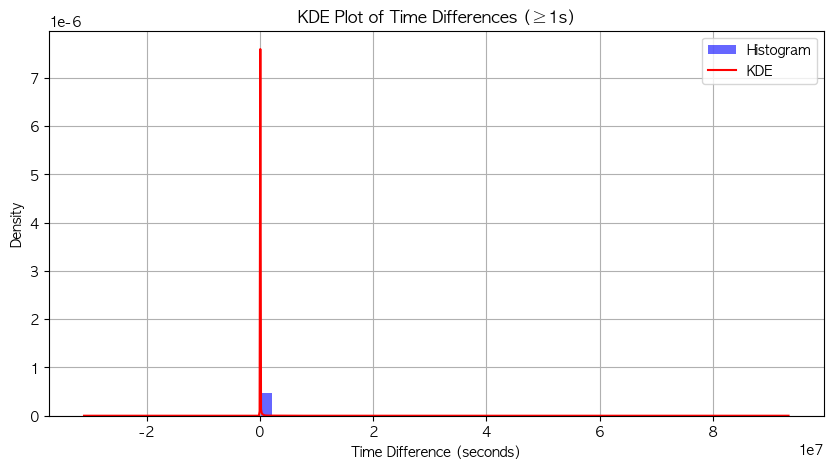

In [62]:
import matplotlib.pyplot as plt

# ✅ 데이터가 비어 있는지 확인 후 실행
if not positive_diffs["time_diff_seconds"].dropna().empty:
    # KDE 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(positive_diffs["time_diff_seconds"].dropna(), bins=30, density=True, alpha=0.6, color='b', label="Histogram")
    positive_diffs["time_diff_seconds"].dropna().plot(kind='kde', color='r', label="KDE")

    # 그래프 설정
    plt.xlabel("Time Difference (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Time Differences (≥1s)")
    plt.legend()
    plt.grid(True)

    # 그래프 출력
    plt.show()
else:
    print("⚠️ 필터링된 데이터가 없습니다. KDE 그래프를 그릴 수 없습니다.")



0초 이상 10초 이하의 아이들을 보자

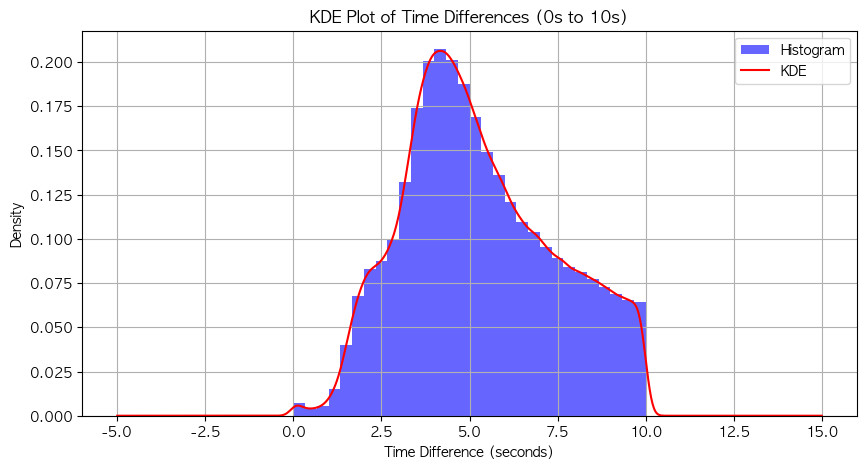

In [63]:
# ✅ 0초 이상 10초 이하의 데이터 필터링
filtered_diffs = complete_lesson_sorted[
    (complete_lesson_sorted["time_diff_seconds"] >= 0) & 
    (complete_lesson_sorted["time_diff_seconds"] <= 10)  # 10초 이하
]

# ✅ 데이터가 있는지 확인 후 실행
if not filtered_diffs["time_diff_seconds"].dropna().empty:
    # KDE 그래프 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(filtered_diffs["time_diff_seconds"].dropna(), bins=30, density=True, alpha=0.6, color='b', label="Histogram")
    filtered_diffs["time_diff_seconds"].dropna().plot(kind='kde', color='r', label="KDE")

    # 그래프 설정
    plt.xlabel("Time Difference (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Time Differences (0s to 10s)")
    plt.legend()
    plt.grid(True)

    # 그래프 출력
    plt.show()
else:
    print("⚠️ 필터링된 데이터가 없습니다. KDE 그래프를 그릴 수 없습니다.")



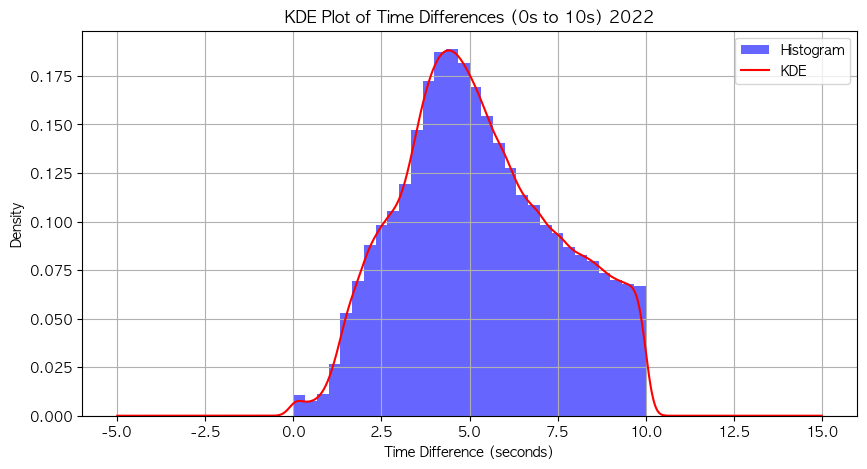

In [75]:
# ✅ 0초 이상 10초 이하의 데이터 필터링
filtered_diffs = complete_lesson_sorted[
    (complete_lesson_sorted["time_diff_seconds"] >= 0) & 
    (complete_lesson_sorted["time_diff_seconds"] <= 10)  # 10초 이하
]
# ✅ 2022년도 데이터 필터링 (1초 이상)
filtered_diffs_2022 = filtered_diffs[filtered_diffs["complete_lesson_time"].dt.year == 2022]

# ✅ 데이터가 있는지 확인 후 실행
if not filtered_diffs_2022["time_diff_seconds"].dropna().empty:
    # KDE 그래프 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(filtered_diffs_2022["time_diff_seconds"].dropna(), bins=30, density=True, alpha=0.6, color='b', label="Histogram")
    filtered_diffs_2022["time_diff_seconds"].dropna().plot(kind='kde', color='r', label="KDE")

    # 그래프 설정
    plt.xlabel("Time Difference (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Time Differences (0s to 10s) 2022")
    plt.legend()
    plt.grid(True)

    # 그래프 출력
    plt.show()
else:
    print("⚠️ 필터링된 데이터가 없습니다. KDE 그래프를 그릴 수 없습니다.")


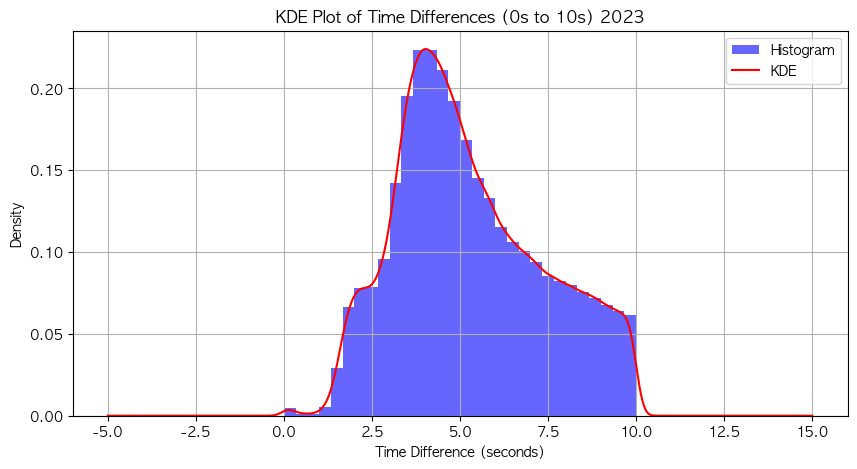

In [76]:
# ✅ 2023년도 데이터 필터링 (1초 이상)
filtered_diffs_2023 = filtered_diffs[filtered_diffs["complete_lesson_time"].dt.year == 2023]

# ✅ 데이터가 있는지 확인 후 실행
if not filtered_diffs_2023["time_diff_seconds"].dropna().empty:
    # KDE 그래프 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(filtered_diffs_2023["time_diff_seconds"].dropna(), bins=30, density=True, alpha=0.6, color='b', label="Histogram")
    filtered_diffs_2023["time_diff_seconds"].dropna().plot(kind='kde', color='r', label="KDE")

    # 그래프 설정
    plt.xlabel("Time Difference (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Time Differences (0s to 10s) 2023")
    plt.legend()
    plt.grid(True)

    # 그래프 출력
    plt.show()
else:
    print("⚠️ 필터링된 데이터가 없습니다. KDE 그래프를 그릴 수 없습니다.")

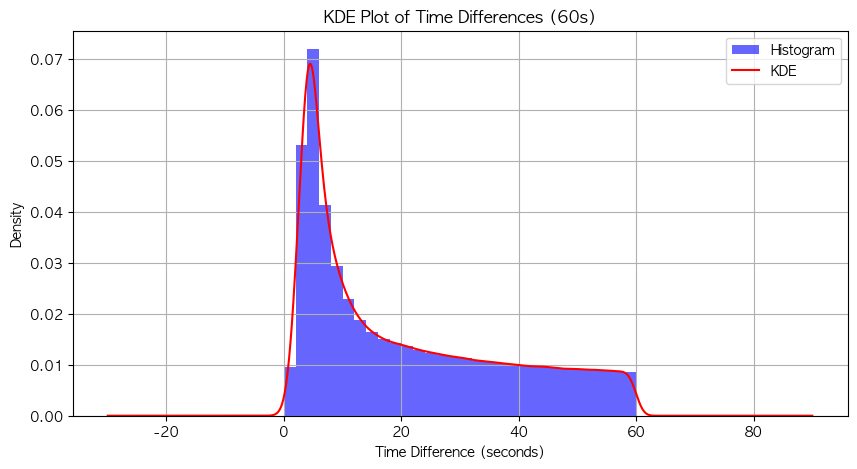

In [66]:
# 1분 이하 데이터 필터링
one_min_diff = complete_lesson_sorted[
    (complete_lesson_sorted["time_diff_seconds"] <= 60)]

# 데이터가 있는지 확인 후 실행
if not one_min_diff["time_diff_seconds"].dropna().empty:
    # KDE 그래프 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(one_min_diff["time_diff_seconds"].dropna(), bins=30, density=True, alpha=0.6, color='b', label="Histogram")
    one_min_diff["time_diff_seconds"].dropna().plot(kind='kde', color='r', label="KDE")
    plt.xlabel("Time Difference (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Time Differences (60s)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("필터링된 데이터가 없습니다. KDE 그래프를 그릴 수 없습니다.")
    


In [67]:
one_min_diff.describe()

,complete_lesson_time,time_diff_seconds
count,1199975,1.199975e+06
mean,2023-01-26 09:23:04.952690432,2.064982e+01
min,2022-01-01 09:17:13.137000,0.000000e+00
25%,2022-08-02 13:51:49.020499968,5.656000e+00
50%,2023-01-29 23:37:06.331000064,1.434700e+01
75%,2023-08-01 15:27:47.985999872,3.359500e+01
max,2023-12-31 23:59:23.612000,6.000000e+01
std,NaN,1.715589e+01


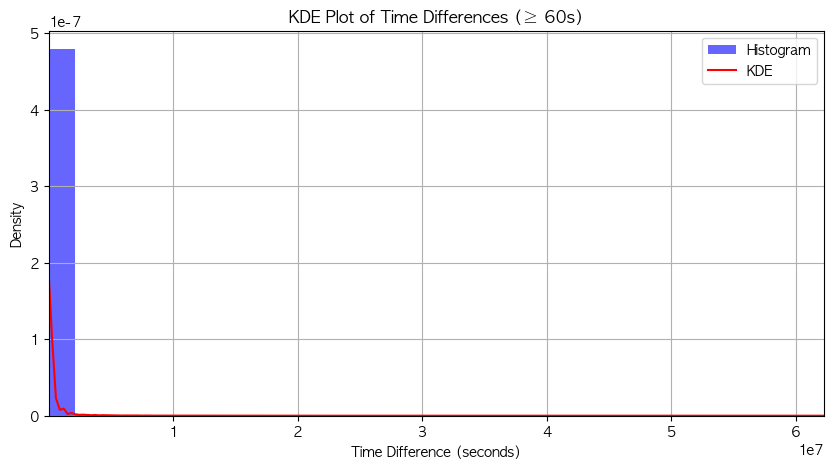

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1분(60초) 이상 데이터 필터링
one_min_above_diff = complete_lesson_sorted[complete_lesson_sorted["time_diff_seconds"] >= 60]

# ✅ 데이터가 있는지 확인 후 실행
if not one_min_above_diff.empty:
    # NaN 제거
    time_diff_values = one_min_above_diff["time_diff_seconds"].dropna()

    # KDE 그래프 시각화
    plt.figure(figsize=(10, 5))
    
    # 히스토그램
    plt.hist(time_diff_values, bins=30, density=True, alpha=0.6, color='b', label="Histogram")
    
    # ✅ Seaborn KDE 사용 (bw_adjust 적용 가능)
    sns.kdeplot(time_diff_values, bw_adjust=0.5, color='r', label="KDE")

    # ✅ X축을 60초 이상으로 강제 조정
    plt.xlim(60, time_diff_values.max())

    # 그래프 설정
    plt.xlabel("Time Difference (seconds)")
    plt.ylabel("Density")
    plt.title("KDE Plot of Time Differences (≥ 60s)")
    plt.legend()
    plt.grid(True)

    # 그래프 출력
    plt.show()
else:
    print("⚠️ 필터링된 데이터가 없습니다. KDE 그래프를 그릴 수 없습니다.")


    

In [ ]:
# 구독한 유저만 필터링
subscribed_users = filtered_grouped_df.dropna(subset=['time_to_subscribe'])

# 구독한 유저 수 계산
num_subscribed_users = len(subscribed_users)

# 평균 구독 전환 시간 계산
average_time_to_subscribe = subscribed_users['time_to_subscribe'].mean()

# 평균 구독 전환 일자 계산
average_days_to_subscribe =  average_time_to_subscribe / 24

print(f"무료 체험 후 첫 결제한 유저 수: {num_subscribed_users}명")
print(f"평균 구독 전환 시간: {average_time_to_subscribe:.2f} 시간")
print(f" 평균 구독 전환 일수: {average_days_to_subscribe:.2f} 일")

무료 체험 후 첫 결제한 유저 수: 7657명
평균 구독 전환 시간: -219.37 시간
 평균 구독 전환 일수: -9.14 일


# 9. renew.subscription
- 정기 결제 완료

In [87]:
renew_subscription = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/renew.subscription.csv')
renew_subscription.drop(columns=['device_carrier'], inplace=True)
renew_subscription.rename(columns={'pg.type': 'pg_type','plan.price':'plan_price','coupon.discout_amount':'coupon_discout_amount'}, inplace=True)
renew_subscription.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon.discount_amount,pg_type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 04:10:06.406,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 04:40:01.895,South Korea,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


In [71]:
# 시간대별 버튼 클릭 횟수 보기
renew_subscription['client_event_time'] = pd.to_datetime(renew_subscription['client_event_time'], errors='coerce')
renew_subscription['month'] = renew_subscription['client_event_time'].dt.to_period('M')

# 날짜별 간편결제 건수
pg_counts = renew_subscription.groupby(['month', 'pg.type']).size().unstack()

# 결과 출력
display(pg_counts)

pg.type,A,B,C
month,,,
2023-10,136.0,NaN,5.0
2023-11,973.0,10.0,21.0
2023-12,1470.0,94.0,23.0


# 10. resubscribe.subscription
- 만료 후 재구독 완료

In [12]:
resubscribe_subscription = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/resubscribe.subscription.csv')
resubscribe_subscription.drop(columns=['device_carrier'], inplace = True)
resubscribe_subscription.rename(columns={'pg.type': 'pg_type','plan.price':'plan_price','coupon.discout_amount':'coupon_discout_amount'}, inplace=True)
resubscribe_subscription.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon.discount_amount,pg_type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN


In [72]:
# 시간대별 버튼 클릭 횟수 보기
resubscribe_subscription['client_event_time'] = pd.to_datetime(resubscribe_subscription['client_event_time'], errors='coerce')
resubscribe_subscription['month'] = resubscribe_subscription['client_event_time'].dt.to_period('M')

# 날짜별 간편결제 건수
pg_counts = resubscribe_subscription.groupby(['month', 'pg.type']).size().unstack()

# 결과 출력
display(pg_counts)

pg.type,A,B
month,,
2023-10,6.0,NaN
2023-11,60.0,3.0
2023-12,57.0,47.0


# 11. start.free_trial
- 서비스 무료체험 시작

In [11]:
start_free_trial = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/start.free_trial.csv')
start_free_trial.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
start_free_trial.rename(columns={'client_event_time': 'start_free_trial_time'}, inplace=True)
start_free_trial.drop(start_free_trial[start_free_trial['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
start_free_trial['start_free_trial_time'] = pd.to_datetime(start_free_trial['start_free_trial_time'])

# 9시간 추가 (UTC+9 적용)
start_free_trial['start_free_trial_time'] = start_free_trial['start_free_trial_time'] + pd.Timedelta(hours=9)

# 시간 필터링
start_free_trial = start_free_trial.loc[
    start_free_trial['start_free_trial_time'].dt.year.between(2022, 2023)]

# button name 변수명 수정하기
start_free_trial.rename(columns={'content.id': 'content_id'}, inplace=True)
start_free_trial.head()

,city,start_free_trial_time,country,device_type,event_type,language,os_name,user_id,plan.price,plan.type,trial.type
0,Seoul,2023-04-06 06:49:36.156,South Korea,Mac,start.free_trial,Korean,Safari,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 17:28:29.384,South Korea,Windows,start.free_trial,Korean,Chrome,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 17:35:00.107,NaN,NaN,start.free_trial,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B
3,Seoul,2023-04-12 20:36:50.250,South Korea,Mac,start.free_trial,Korean,Safari,cc8051a75f62278b0e4216dd0a182d8c,15920.0,1개월 플랜,B
4,NaN,2023-02-18 13:13:20.822,NaN,NaN,start.free_trial,NaN,NaN,4cc436ad294973993ccad3e3a70053a7,131600.0,12개월 플랜,B


In [87]:
start_free_trial['plan.type'].value_counts()

plan.type
1개월 플랜     1278
12개월 플랜    1161
Name: count, dtype: int64

In [88]:
start_free_trial['user_id'].nunique()

16309

In [10]:
start_free_trial['user_id'].isna().sum()

14

In [89]:
start_free_trial['trial.type'].value_counts()

trial.type
A    28182
B     2439
Name: count, dtype: int64

In [90]:
#각 날짜별 trial type 보기
start_free_trial['client_event_time'] = pd.to_datetime(start_free_trial['client_event_time'])

monthly_trial = (
    start_free_trial
    .groupby([start_free_trial['client_event_time'].dt.to_period('M'), 'trial.type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

display(monthly_trial)

trial.type,client_event_time,A,B
0,2021-12,5,0
1,2022-01,4706,0
2,2022-02,3021,0
3,2022-03,4187,0
4,2022-04,4117,0
5,2022-05,4763,0
6,2022-06,4753,0
7,2022-07,1469,0
8,2022-08,304,0
9,2022-09,372,0


# 12. start.content
- 콘텐츠 수강 시작

In [ ]:
start_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/start.content.csv')
start_content.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
start_content.rename(columns={'client_event_time': 'start_content_time'}, inplace=True)
start_content.drop(start_content[start_content['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
start_content['start_content_time'] = pd.to_datetime(start_content['start_content_time'])

# 9시간 추가 (UTC+9 적용)
start_content['start_content_time'] = start_content['start_content_time'] + pd.Timedelta(hours=9)

# 시간 필터링
start_content = start_content.loc[
    start_content['start_content_time'].dt.year.between(2022, 2023)]

# 변수명 수정하기
start_content.rename(columns={'content.id': 'content_id'}, inplace=True)
start_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040000,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467000,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [92]:
start_content['content.difficulty'].value_counts()

content.difficulty
beginner        58628
intermediate    36109
advanced        27485
hard             2695
Name: count, dtype: int64

In [93]:
content_level_count = start_content[['user_id','content.difficulty']].value_counts()
content_level_count.head(20)

user_id                           content.difficulty
f59e4102149edeb73cb33ccecf95dcd9  advanced              48
cc180eef3ffd3497eb8a575165bab389  advanced              45
28068259a009cf16d0e19ae1896b1f22  advanced              43
caec8b3be818f1408e0d47d89acc245f  advanced              37
d4ab482f7d12adb21f6e9b1c68367d17  advanced              36
40504dbd203dd148d1801171d04ceb5d  advanced              34
6421bf3808b89da97f316eac07da2b91  advanced              34
5c0fe6d9885212ba763dea44677ad037  advanced              32
53141e48b97505b9f1d5ae210967b8ee  advanced              32
6ffc35355c182a39e4e3739a8df0fed4  advanced              31
61ae68a40e1d1aadc79dc6a41825c923  advanced              31
63518a68900f95baa9d76fb444a4e183  advanced              31
85ac0cd1c2a7fa2939df3061ec822eb1  advanced              31
0ea2cadbe7c50ef5c0fd22aa1a800bea  advanced              31
9e50bb9740e9dcc09b04e952e8934504  advanced              30
b53ed38fbc92e9d582322a00b5716995  advanced              29
5b7

# 13. enter.lesson_page
- 레슨 시작
- is_free_trial: 무료 공개 레슨에 대한 진입 여부. 특정 기준 시점 사용 x
- is_trial: 무료 공개 레슨에 대한 진입이면서 그 유저가 현재 구독하지 않은 회원인지 여부

In [23]:
enter_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.lesson_page.csv')
enter_lesson.drop(columns=['device_carrier','os_version','device_family','platform'], inplace=True)
enter_lesson.rename(columns={'client_event_time': 'enter_lesson_time','content.id':'content_id','lesson.id':'lesson_id'}, inplace=True)
enter_lesson.drop(enter_lesson[enter_lesson['os_name'] == 'Chrome Headless'].index, inplace=True)

# client_event_time을 datetime 형식으로 변환
enter_lesson['enter_lesson_time'] = pd.to_datetime(enter_lesson['enter_lesson_time'])

# 9시간 추가 (UTC+9 적용)
enter_lesson['enter_lesson_time'] = enter_lesson['enter_lesson_time'] + pd.Timedelta(hours=9)

# 시간 필터링
enter_lesson = enter_lesson.loc[
    enter_lesson['enter_lesson_time'].dt.year.between(2022, 2023)]

enter_lesson.head()

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_25392/3363005607.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.lesson_page.csv')


,city,enter_lesson_time,country,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Wonju,2023-04-06 06:46:04.333,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-06 06:55:50.787,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-06 06:55:55.684,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-06 06:04:55.828,South Korea,Mac,enter.lesson_page,Korean,Chrome,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-06 06:05:34.139,South Korea,Mac,enter.lesson_page,Korean,Chrome,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [18]:

# is_free_trial이 True인 행만 필터링
free_trial_contents_a = enter_lesson[enter_lesson['is_free_trial'] == True]

# 고유한 content_id 개수 확인
num_free_trial_contents_a = free_trial_contents_a['content_id'].nunique()

print(f"is_free_trial 콘텐츠 개수: {num_free_trial_contents_a}")



is_free_trial 콘텐츠 개수: 22


In [ ]:
# is_trial이 True인 행만 필터링
free_trial_contents_b = enter_lesson[enter_lesson['is_trial'] == True]

# 고유한 content_id 개수 확인
num_free_trial_contents_b = free_trial_contents_b['content_id'].nunique()

print(f"is_trial 콘텐츠 개수: {num_free_trial_contents_b}")


is_trial 콘텐츠 개수: 5


In [20]:
# is_free_trial이 True인 콘텐츠 ID 리스트
is_free_trial_content_ids = free_trial_contents_a['content_id'].unique()

# is_trial이 True인 콘텐츠 ID 리스트
is_trial_content_ids = free_trial_contents_b['content_id'].unique()

# 출력
print("무료 체험 (is_free_trial) 콘텐츠 ID 목록:")
for idx, content_id in enumerate(is_free_trial_content_ids, 1):
    print(f"{idx}. {content_id}")

print("\n무료 체험 (is_trial) 콘텐츠 ID 목록:")
for idx, content_id in enumerate(is_trial_content_ids, 1):
    print(f"{idx}. {content_id}")


무료 체험 (is_free_trial) 콘텐츠 ID 목록:
1. a914987711c7e2db9fd4bff7555ec87c
2. afe201c04b426366e0f8e9e2207c78c2
3. 101e1d0dcc38d9c86156f008a145083e
4. 68a3658f1b936bfff3bd6960cd561b0a
5. f4be1a0fe0e301b03115591777fddf29
6. c269eb6df3a374b464f7c18f12fa398f
7. d6227ba76134f6cf821bb98b5f235bd0
8. 621c7ad99b17d2d16832b618d47aea7e
9. 220ce7873b8895d0c81c37600b5bd1e7
10. 6b0a538ad5dfddde4d4b9e6ce6c00a67
11. 7fef928cdccef0185dfb931ef59b37d7
12. c8affa8409b8bd58d00d3477dd2b8ba5
13. 7cebec6e79cc981dbf421c5ec2aedd9d
14. 32cf55a55adcc30ad80b674c0fee2ff4
15. 479926b04fe824bce5bdc7e0f81a2539
16. e543c38ec7fa6bcd5045049ecc31e5f8
17. 38df90d4de533d6296b52c6a1d90e26b
18. 5acd4977e14d5edc6a408ae0d468ca4e
19. 8a72eed73d3f9d3ab1771548070e7338
20. ab7068685b7aeac4d6b1a6c0e1c85819
21. c7a97d9b71626d5115e2bcdadfe4dd48
22. db82104b9c508953b3d00eea82844a48

무료 체험 (is_trial) 콘텐츠 ID 목록:
1. 61b6463287573f00de13a930805a52d6
2. c269eb6df3a374b464f7c18f12fa398f
3. 445fac33232adcb3d1cdab7d8a579430
4. 710ffb5be9f89772b7baa9

In [21]:
# 두 리스트를 set으로 변환 후 교집합 찾기
overlapping_content_ids = set(is_free_trial_content_ids) & set(is_trial_content_ids)

# 출력
print(f"\n무료 체험 (is_free_trial)과 무료 체험 (is_trial)의 겹치는 콘텐츠 ID 개수: {len(overlapping_content_ids)}")

print("\n겹치는 콘텐츠 ID 목록:")
for idx, content_id in enumerate(overlapping_content_ids, 1):
    print(f"{idx}. {content_id}")



무료 체험 (is_free_trial)과 무료 체험 (is_trial)의 겹치는 콘텐츠 ID 개수: 1

겹치는 콘텐츠 ID 목록:
1. c269eb6df3a374b464f7c18f12fa398f


In [28]:
#무료 체험 콘텐츠 아이디
free_contents_ids = (set(is_free_trial_content_ids) | set(is_trial_content_ids)) - overlapping_content_ids

# 14. complete.lesson
- 레슨 완료

In [16]:
complete_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/complete.lesson.csv')
complete_lesson.drop(columns=['device_carrier'], inplace=True)
complete_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
complete_lesson.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
0,Wonju,2023-04-05 21:55:51.836000,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-05 21:19:01.243000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-05 21:20:27.939000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-05 21:23:01.534000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-05 21:28:34.965000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


# 15. click.lesson_page_related_question_box
- 레슨 페이지 내 질문 목록 클릭

In [17]:
lesson_comment = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.lesson_page_related_question_box.csv')
lesson_comment.drop(columns=['device_carrier'], inplace = True)
lesson_comment.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id','question.id':'question_id'}, inplace=True)
lesson_comment.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
0,Dong-gu,2023-04-05 21:51:48.377000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,Dong-gu,2023-04-05 21:52:21.689000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,Dong-gu,2023-04-05 21:52:42.481000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
3,Goyang-si,2023-04-05 21:20:15.032000,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,9016e2246486e852992ccd9ae0eb27ca,c269eb6df3a374b464f7c18f12fa398f,395bdf0293b24ec47d5a9e960574f851
4,Goyang-si,2023-04-05 21:21:55.275000,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,4ecd552eeded70b3274b8edf3ecacbd9,c269eb6df3a374b464f7c18f12fa398f,a738c7835388066e2618af1e5ebacb3c


# 16. end.content
- 콘텐츠 수강 완료

In [18]:
end_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/end.content.csv')
end_content.drop(columns=['device_carrier'], inplace=True)
end_content.rename(columns={'content.id':'content_id'})
end_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Yokohama,2023-04-10 14:02:10.600000,Japan,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 14:21:26.466000,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 14:37:04.440000,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 14:37:19.909000,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 14:08:58.968000,South Korea,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


# 17. click.cancel_plan_button
- 구독 취소 버튼 클릭

In [19]:
click_cancel = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.cancel_plan_button.csv')
click_cancel.drop(columns=['device_carrier'], inplace = True)
click_cancel.head()


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180
